In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [72]:
str_results = pd.read_csv("../04_structural_models/structural_model_results.csv")
#img_results = pd.read_csv("../05_cellpainting_models/cellpainting_results.csv")
img_results = str_results

In [73]:
# Rename columns with 'atr_' and 'img_'
str_results = str_results.rename(columns=lambda x: 'str_' + x if x != str_results.columns[0] else x)
img_results = img_results.rename(columns=lambda x: 'img_' + x if x != img_results.columns[0] else x)

In [74]:
def replace_numeric_with_similar(value):
    if pd.notna(value) and isinstance(value, (int, float)):
        return value + np.random.uniform(-0.1, 0.1)  # Adjust the range as needed
    else:
        return value

# Apply the function to all elements in the DataFrame
img_results = img_results.applymap(replace_numeric_with_similar)

In [75]:
# Merge the DataFrames on the first column (assuming it's a common identifier)
results_df = pd.merge(str_results, img_results, on="endpoint", suffixes=('_atr', '_img'))
results_df

,endpoint,str_CV_AUC_mean,str_CV_AUC_std,str_Held_out_TP,str_Held_out_TN,str_Held_out_FP,str_Held_out_FN,str_Held_out_BA,str_Held_out_AUC,str_Held_out_MCC,...,img_Held_out_Specificity,img_Held_out_Sensitivity,img_CV_R2_mean,img_CV_R2_std,img_Held_out_R2,img_Held_out_RMSE,img_Held_out_median_fold_error,img_Held_out_perc_2_fold,img_Held_out_perc_3_fold,img_Held_out_perc_5_fold
0,BSK_3C_VCAM1_down,0.699709,0.043135,6.0,50.0,6.0,9.0,0.646429,0.660714,0.318991,...,0.938484,0.431274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TOX21_p53_BLA_p5_viability,0.743498,0.070915,6.0,456.0,14.0,17.0,0.615541,0.704533,0.247021,...,0.941986,0.345631,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,APR_HepG2_MicrotubuleCSK_24h_up,0.597933,0.144702,1.0,50.0,3.0,4.0,0.571698,0.811321,0.158830,...,0.915527,0.114150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BSK_CASM3C_MCSF_down,0.688836,0.106173,6.0,48.0,11.0,6.0,0.656780,0.665254,0.275369,...,0.767847,0.563044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BSK_CASM3C_TissueFactor_down,0.653295,0.114399,1.0,59.0,2.0,9.0,0.533607,0.654098,0.116226,...,1.056540,0.185328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,terminal_t1_per_2_h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.046477,0.033688,0.102127,0.542094,2.511251,37.856999,63.328049,82.860477
374,human_CL_mL_per_min_per_kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.090710,0.035965,0.238023,0.510462,2.086796,44.727454,67.426248,83.114269
375,human_VDss_L_per_kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.320955,-0.028265,0.498039,0.532978,2.205105,41.345493,64.064156,82.075877
376,fraction_unbound_in_plasma_fu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.200154,0.023609,0.548181,0.306123,2.400178,41.304707,60.906639,71.425304


In [76]:
import pickle

pickle_file_path = '../02_Explore_JUMP_compounds/activity_columns_mapping_selected.pkl'

# Loading the dictionary
with open(pickle_file_path, 'rb') as file:
    activity_columns_mapping = pickle.load(file)

In [77]:
def map_to_group(endpoint):
    for group, endpoints in activity_columns_mapping.items():
        if endpoint in endpoints:
            return group
    return 'Other'  # A default group if not found in the mapping

# Add a new column 'Mapping_Group' based on 'Endpoint'
results_df['Task'] = results_df['endpoint'].apply(lambda x: map_to_group(x))
results_df

,endpoint,str_CV_AUC_mean,str_CV_AUC_std,str_Held_out_TP,str_Held_out_TN,str_Held_out_FP,str_Held_out_FN,str_Held_out_BA,str_Held_out_AUC,str_Held_out_MCC,...,img_Held_out_Sensitivity,img_CV_R2_mean,img_CV_R2_std,img_Held_out_R2,img_Held_out_RMSE,img_Held_out_median_fold_error,img_Held_out_perc_2_fold,img_Held_out_perc_3_fold,img_Held_out_perc_5_fold,Task
0,BSK_3C_VCAM1_down,0.699709,0.043135,6.0,50.0,6.0,9.0,0.646429,0.660714,0.318991,...,0.431274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,toxcast
1,TOX21_p53_BLA_p5_viability,0.743498,0.070915,6.0,456.0,14.0,17.0,0.615541,0.704533,0.247021,...,0.345631,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,toxcast
2,APR_HepG2_MicrotubuleCSK_24h_up,0.597933,0.144702,1.0,50.0,3.0,4.0,0.571698,0.811321,0.158830,...,0.114150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,toxcast
3,BSK_CASM3C_MCSF_down,0.688836,0.106173,6.0,48.0,11.0,6.0,0.656780,0.665254,0.275369,...,0.563044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,toxcast
4,BSK_CASM3C_TissueFactor_down,0.653295,0.114399,1.0,59.0,2.0,9.0,0.533607,0.654098,0.116226,...,0.185328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,toxcast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,terminal_t1_per_2_h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.046477,0.033688,0.102127,0.542094,2.511251,37.856999,63.328049,82.860477,PK_Lombardo
374,human_CL_mL_per_min_per_kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.090710,0.035965,0.238023,0.510462,2.086796,44.727454,67.426248,83.114269,PK_Lombardo
375,human_VDss_L_per_kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.320955,-0.028265,0.498039,0.532978,2.205105,41.345493,64.064156,82.075877,PK_Lombardo
376,fraction_unbound_in_plasma_fu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.200154,0.023609,0.548181,0.306123,2.400178,41.304707,60.906639,71.425304,PK_Lombardo


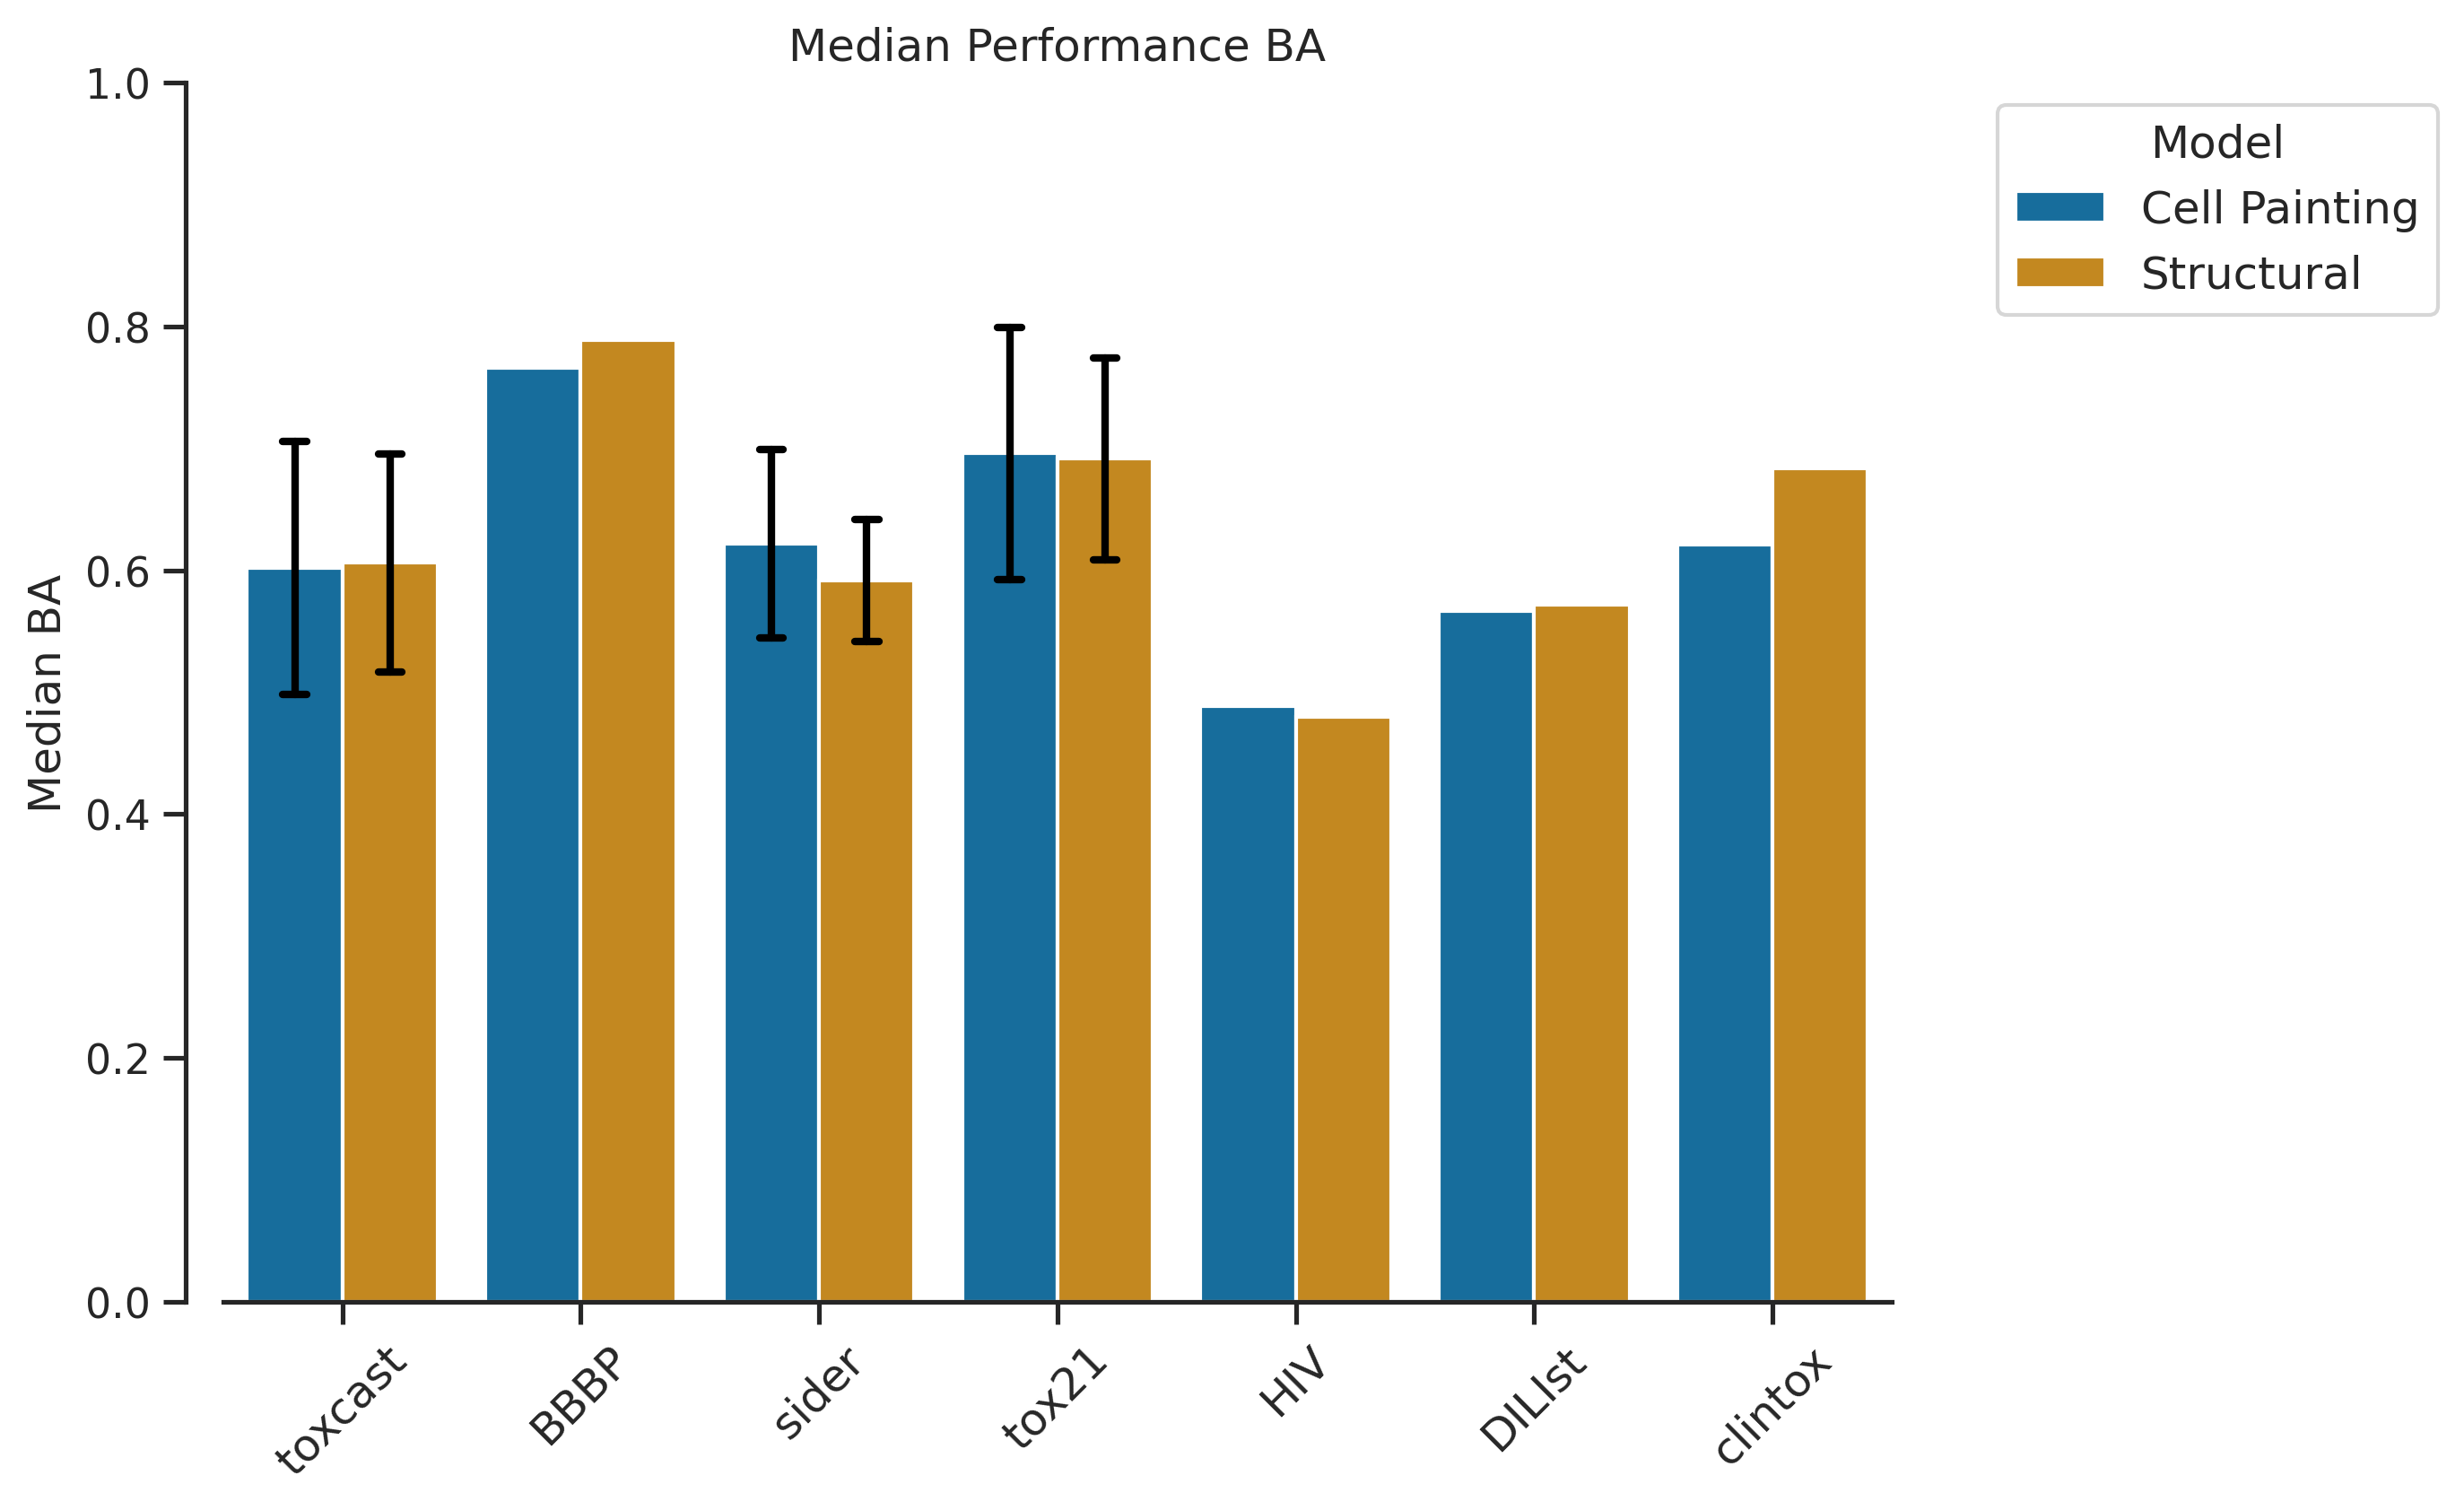

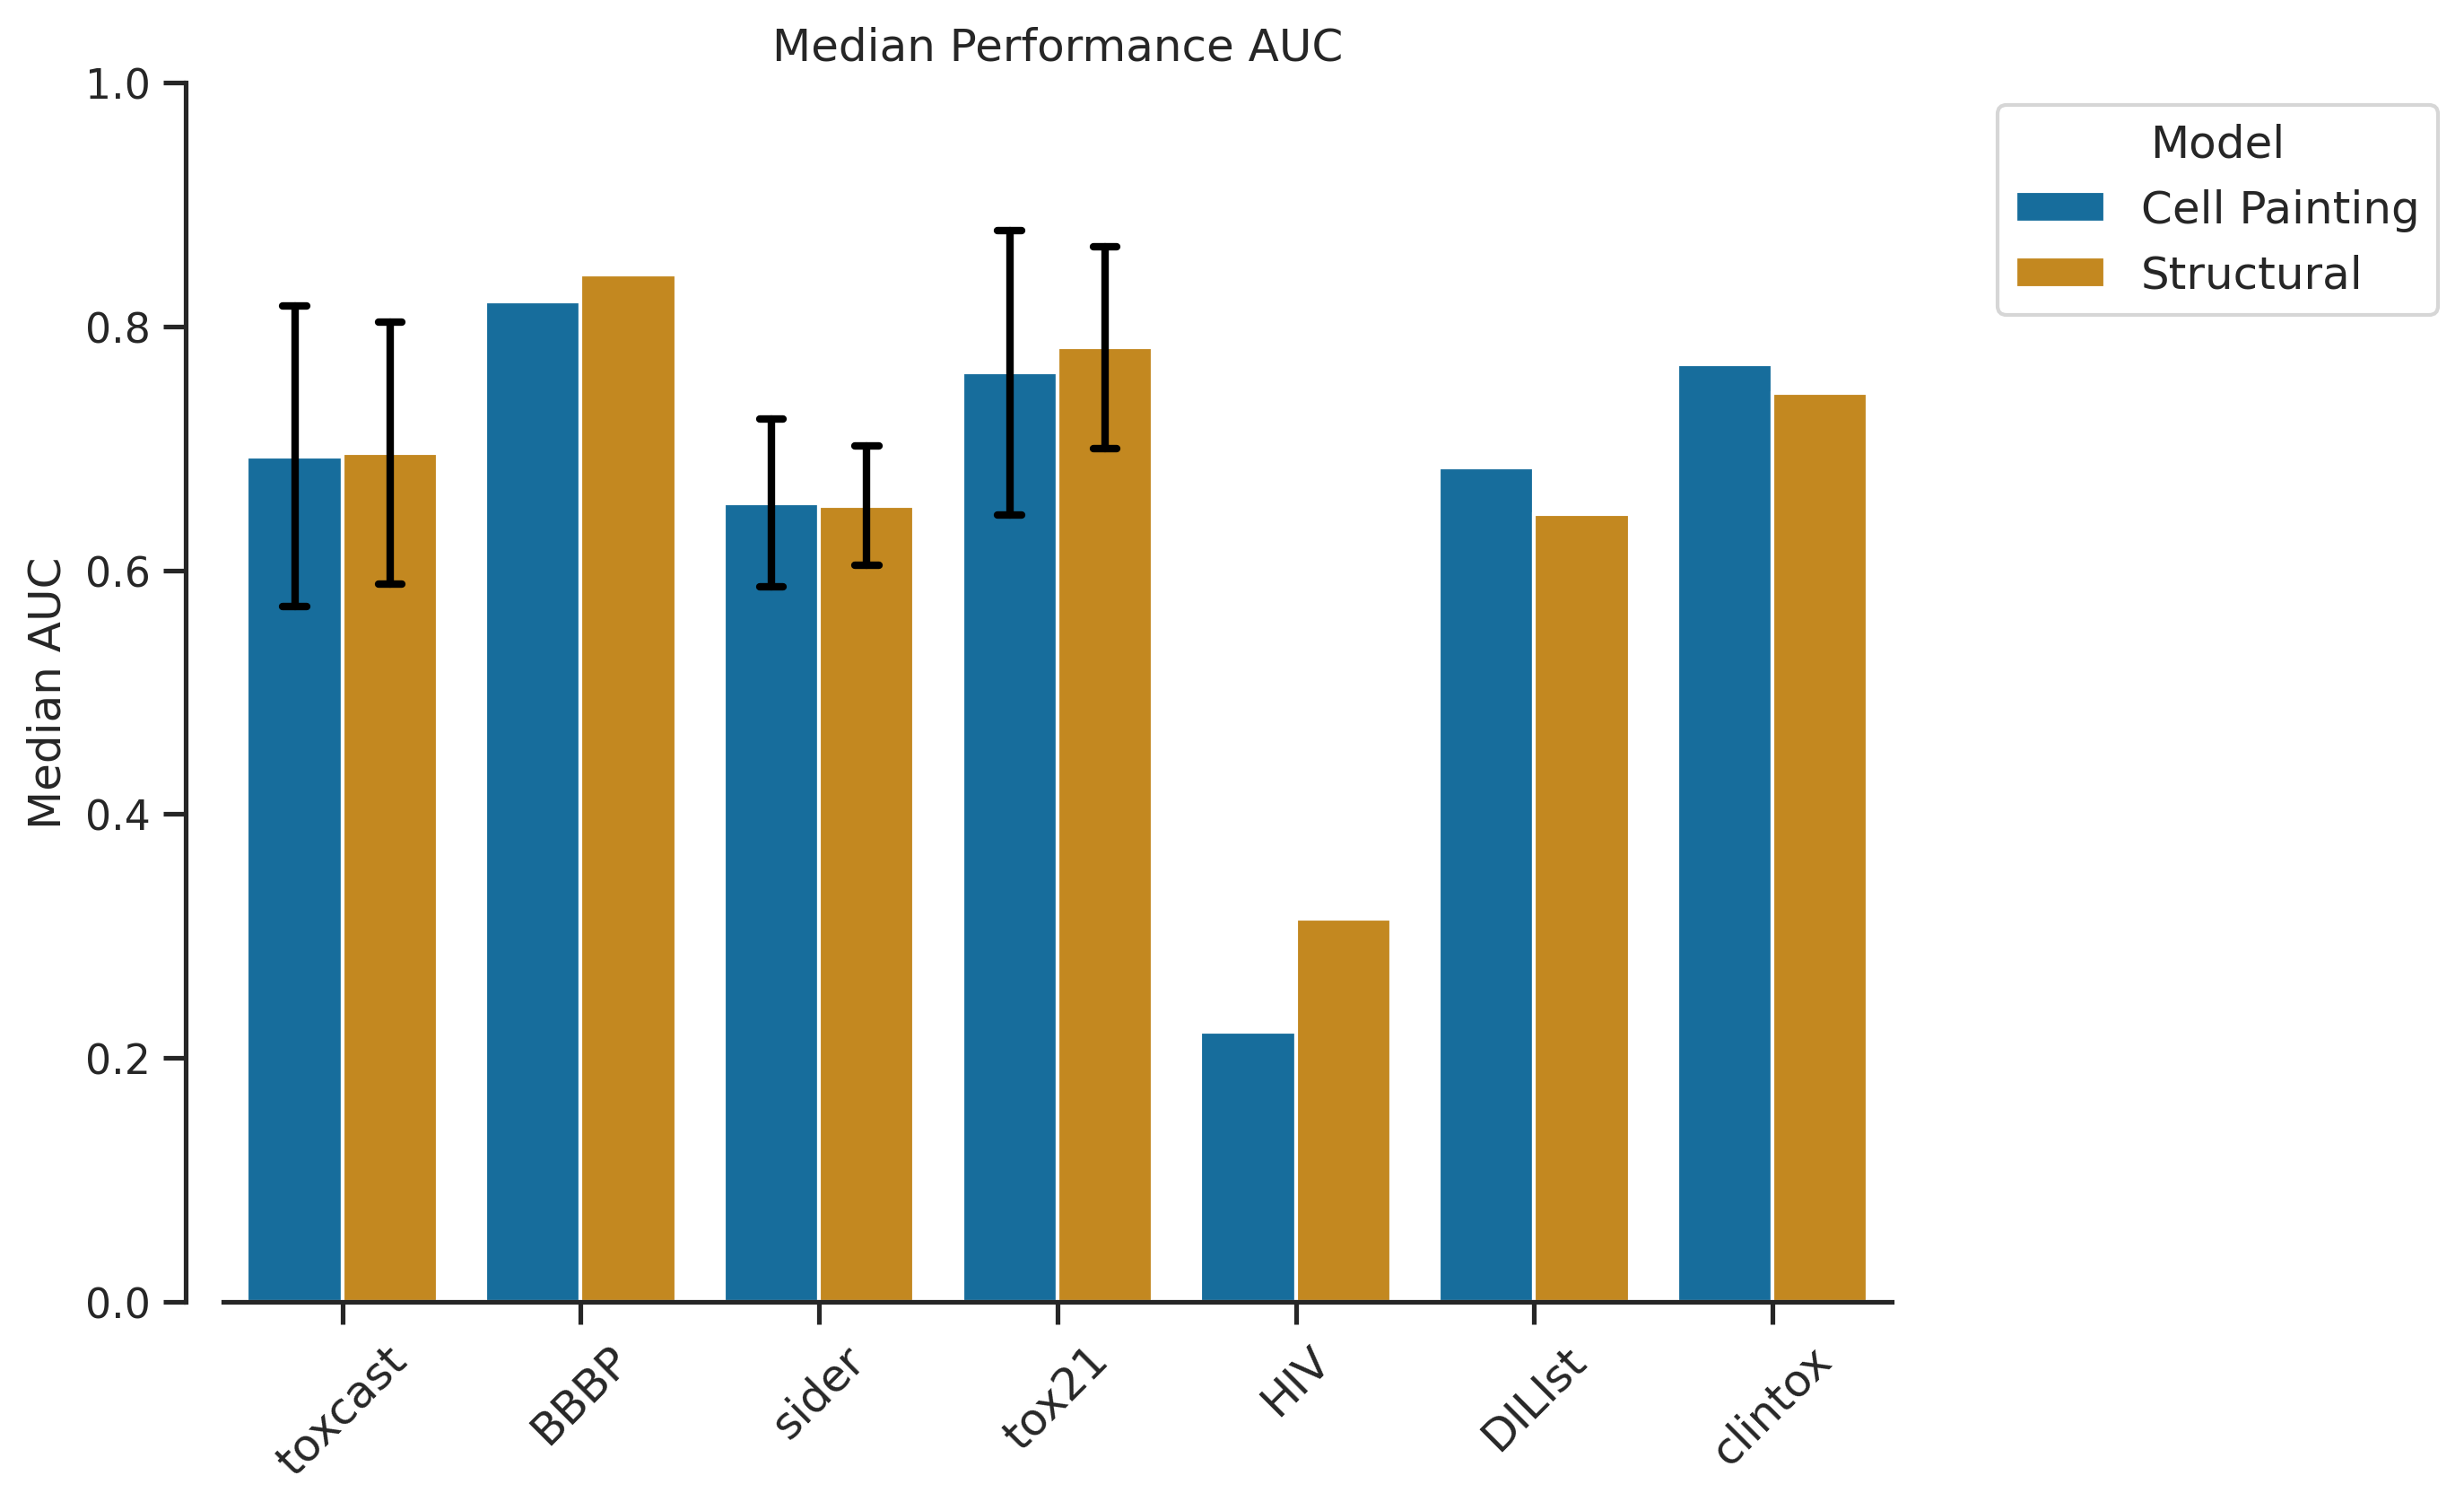

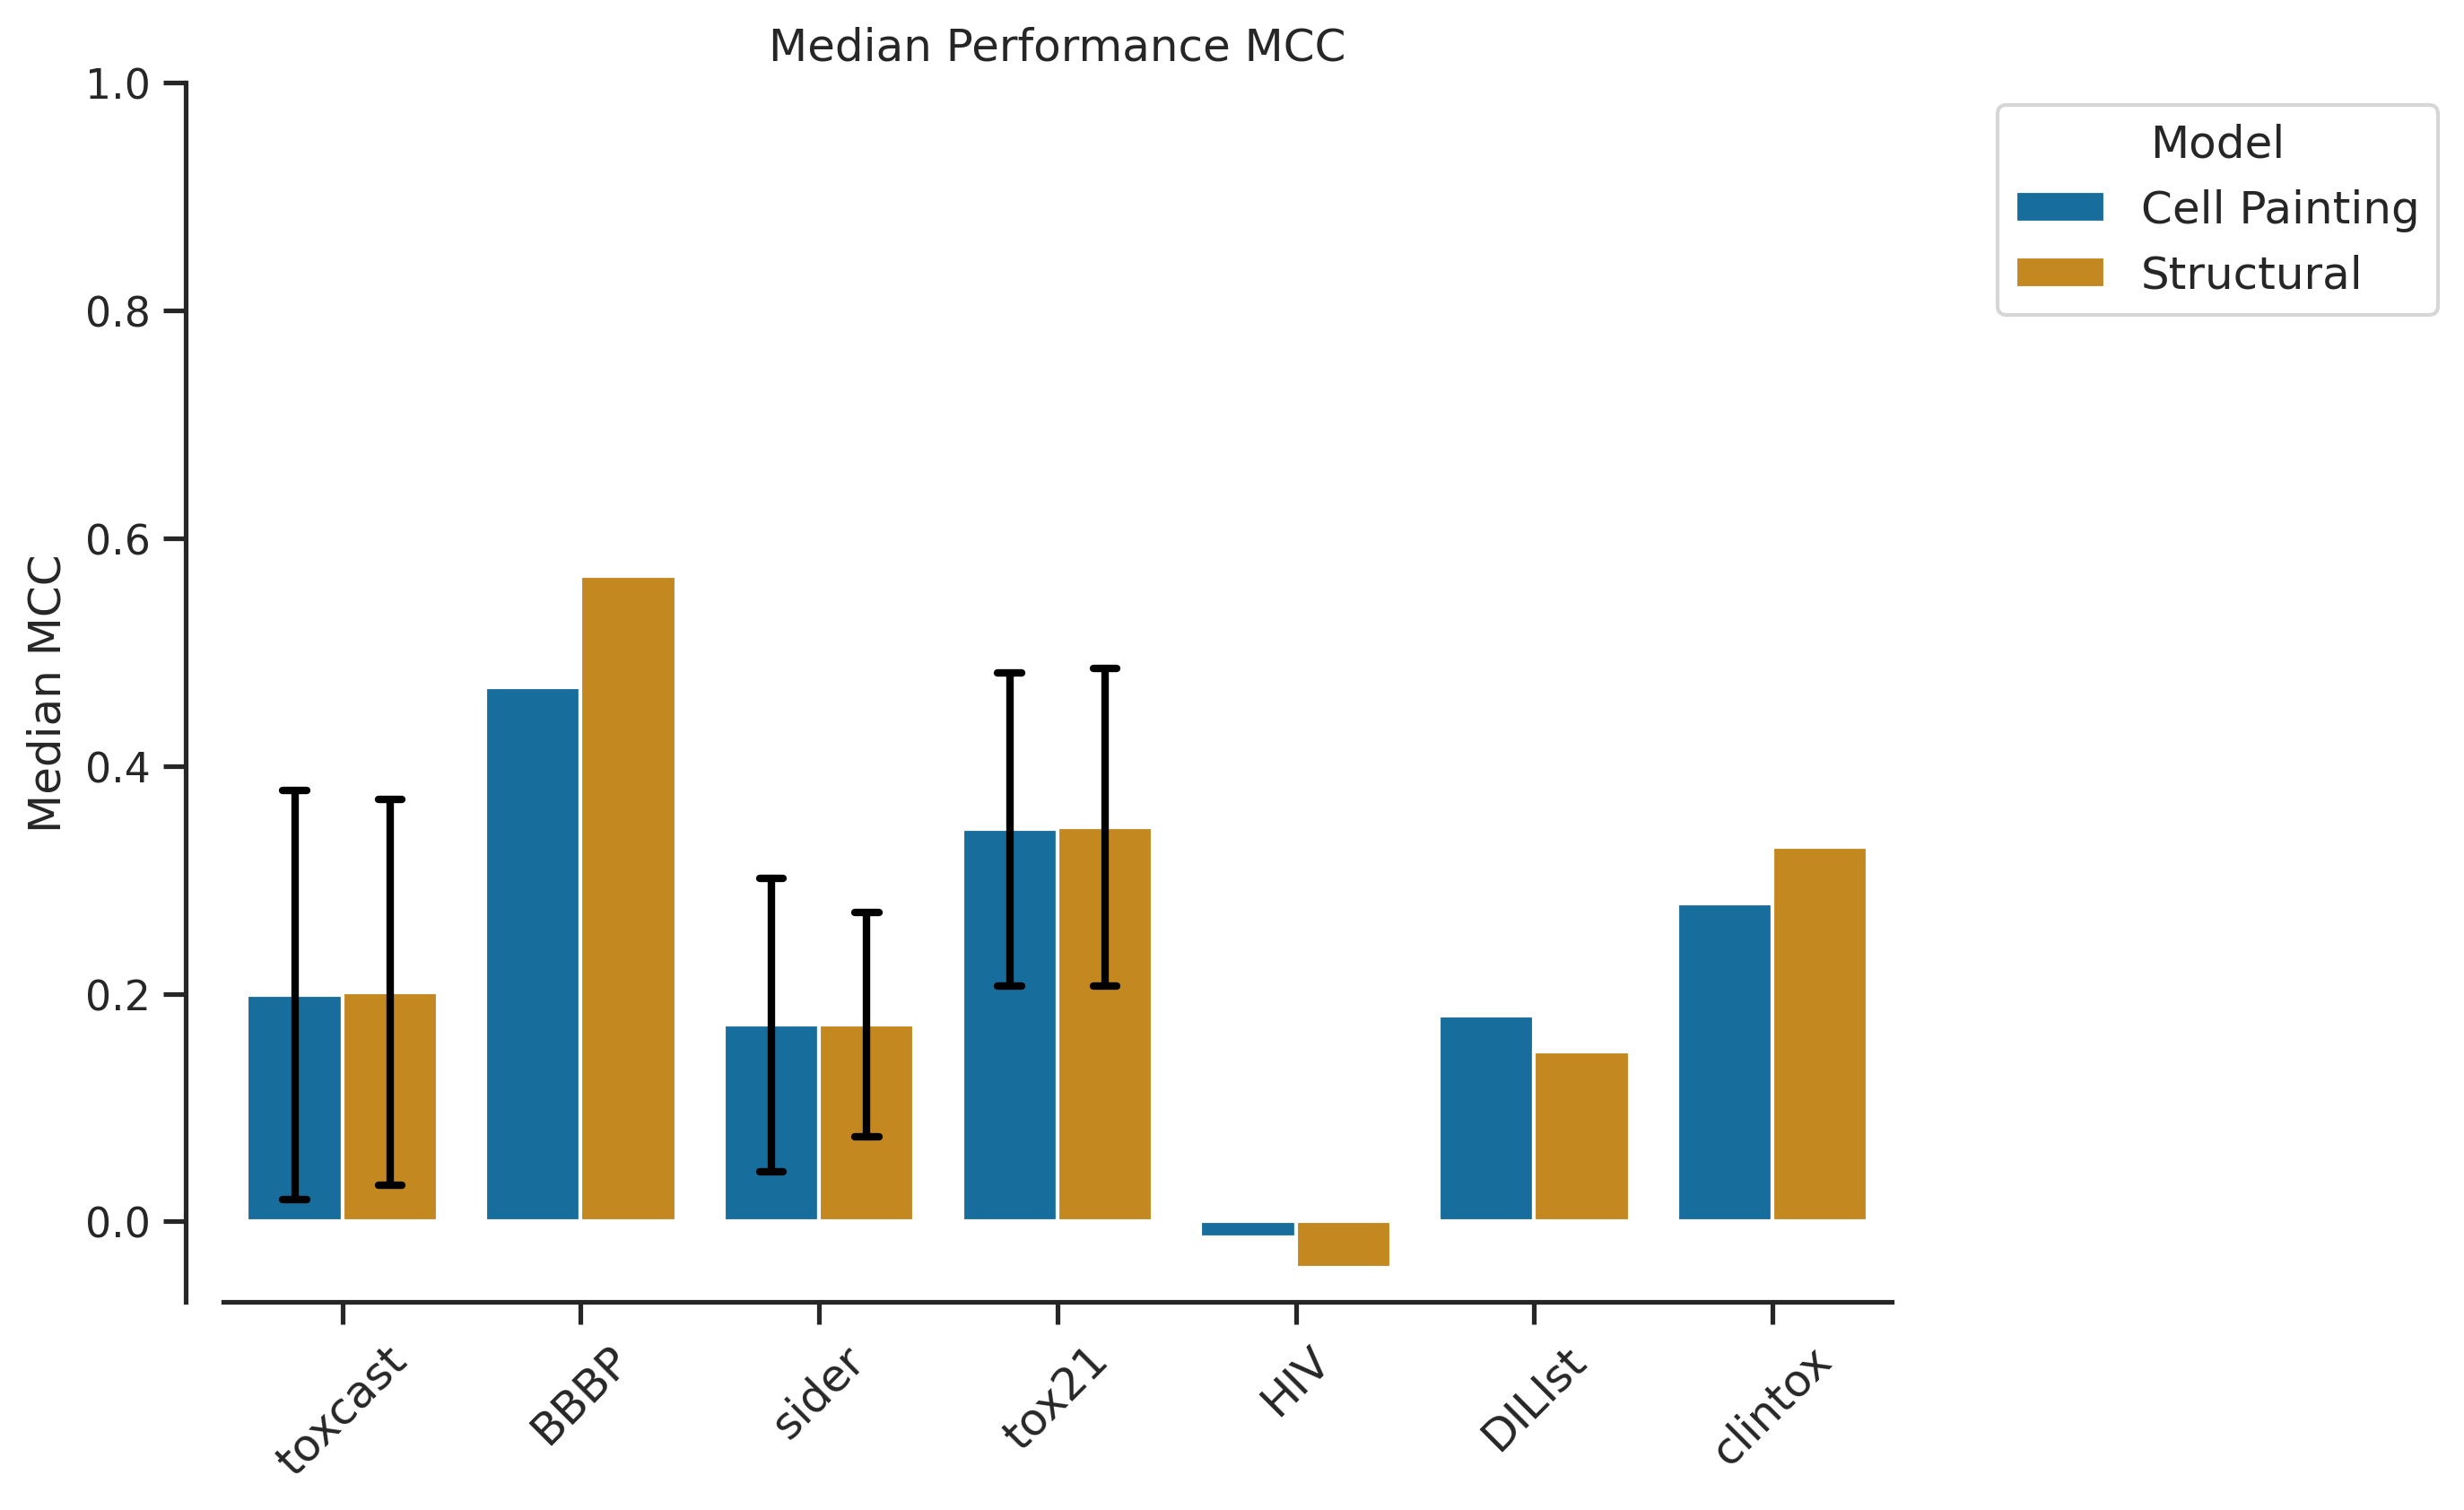

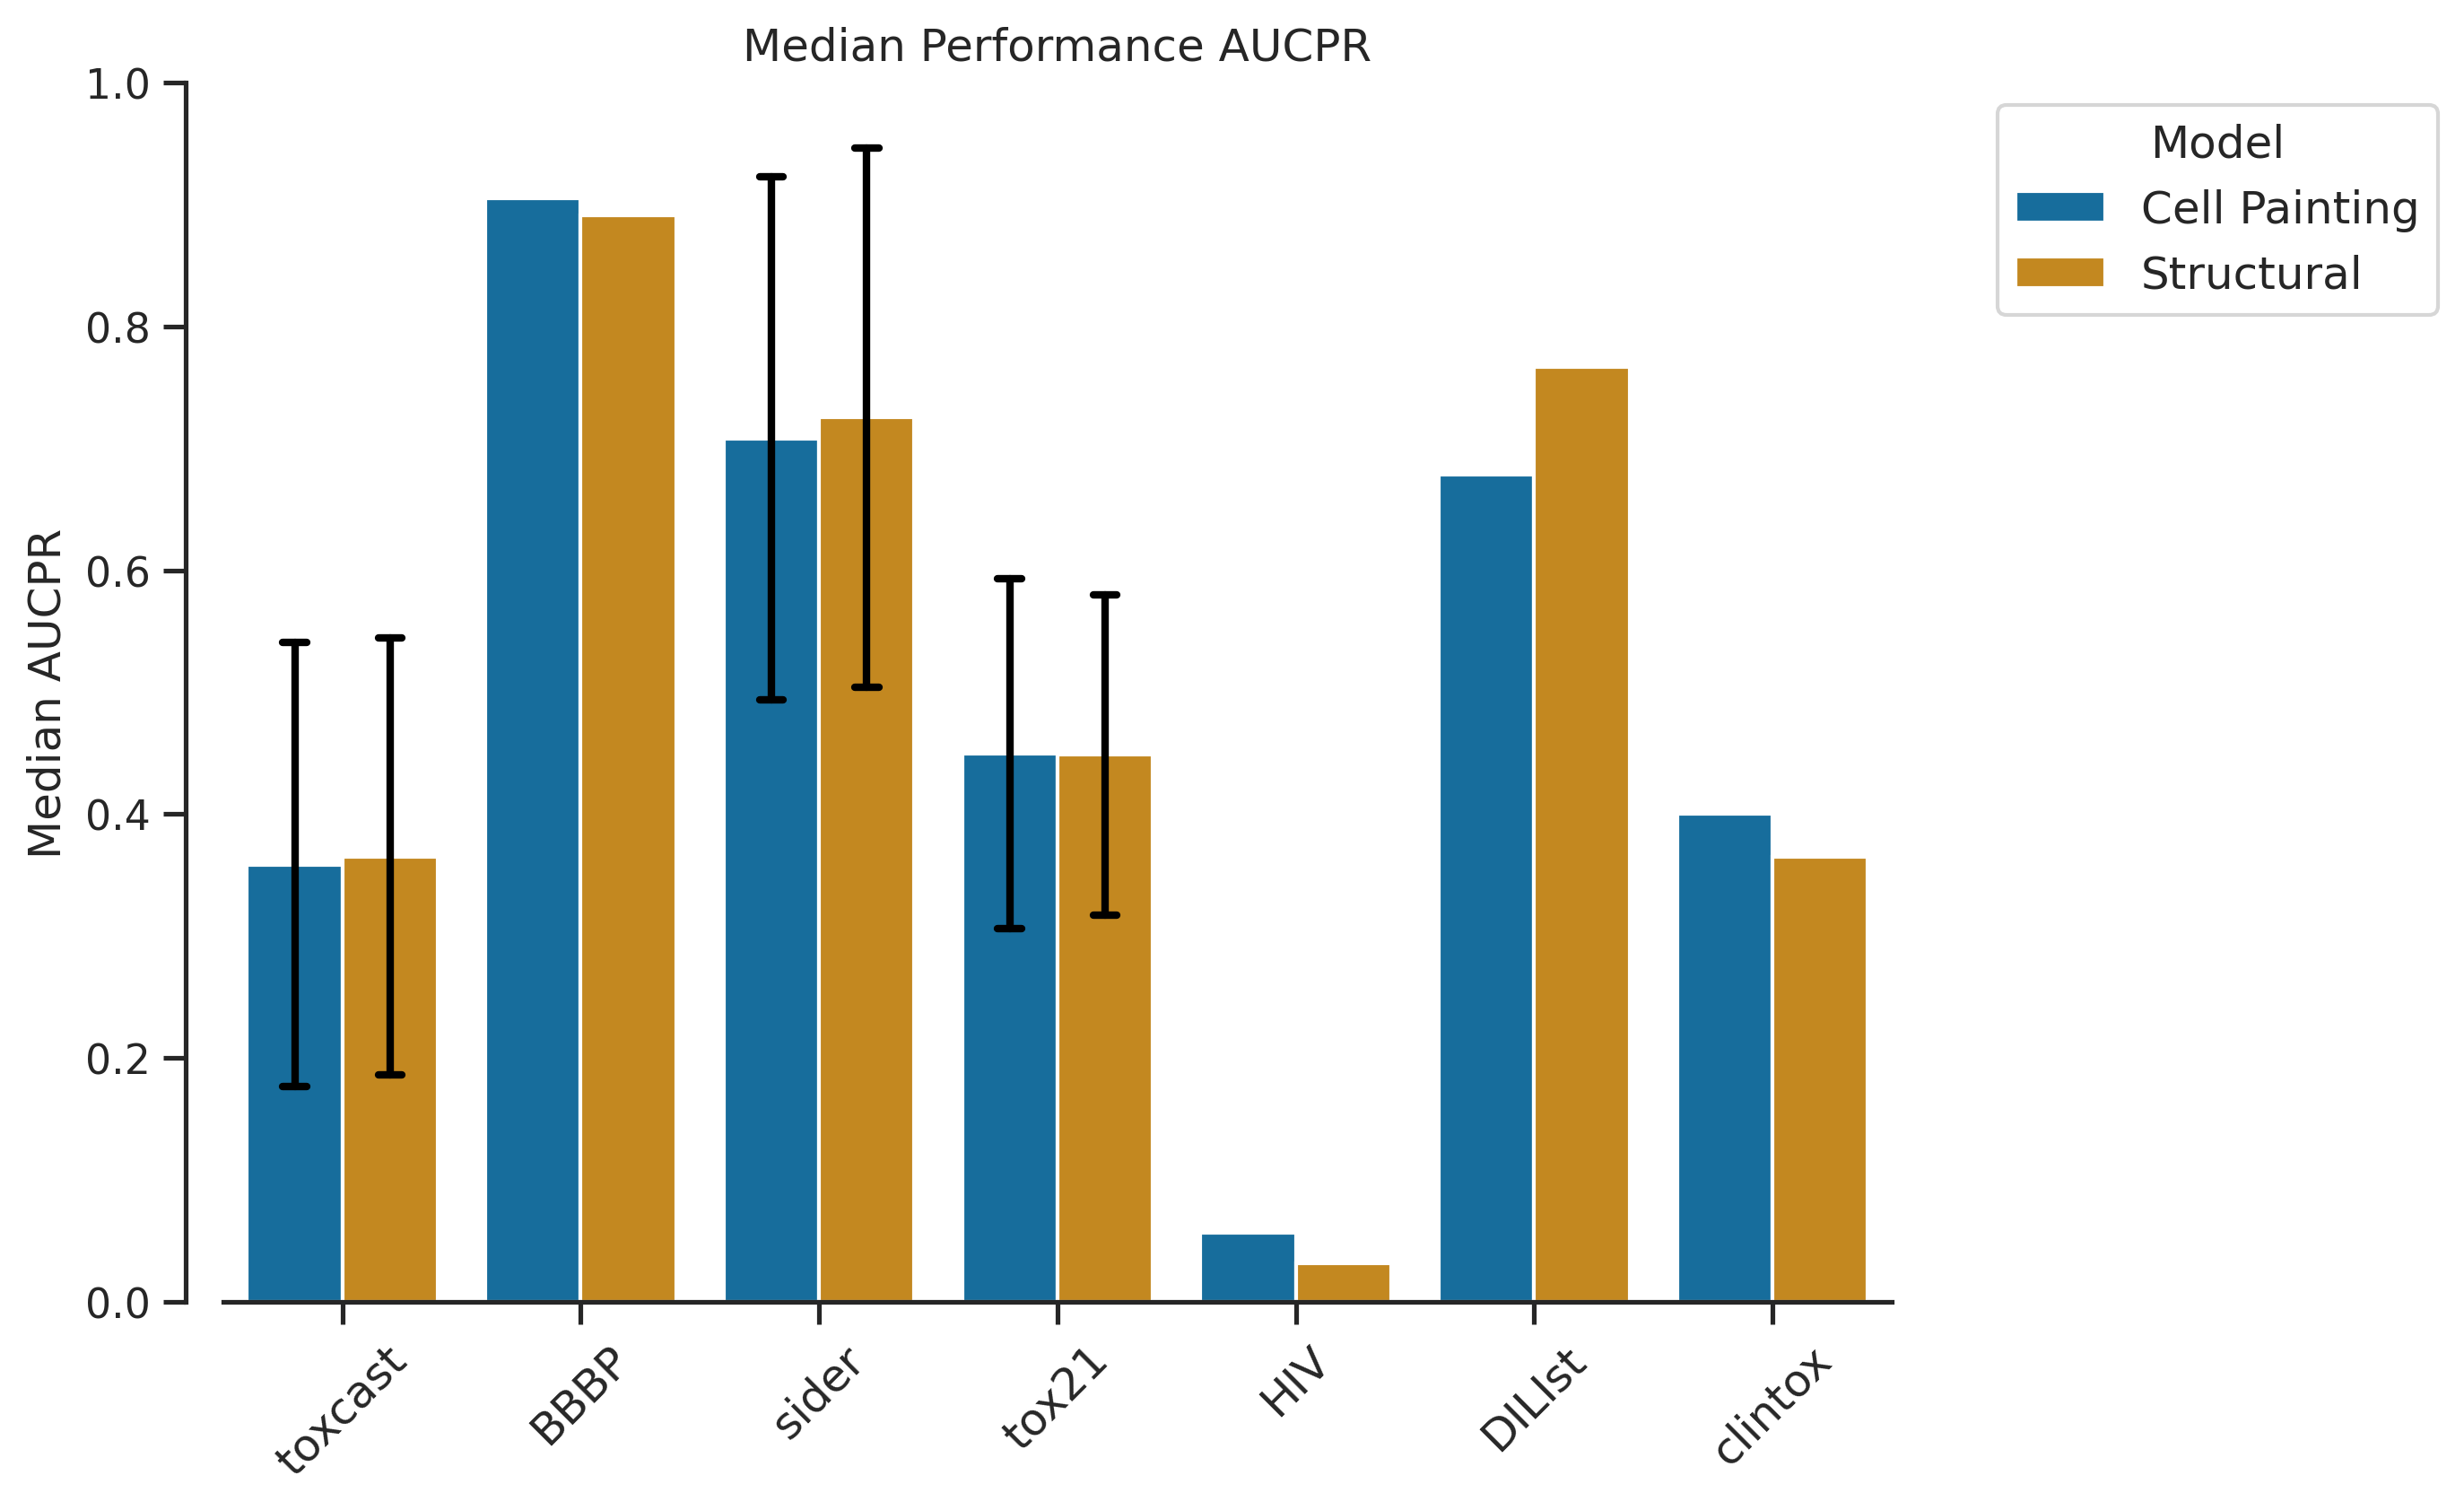

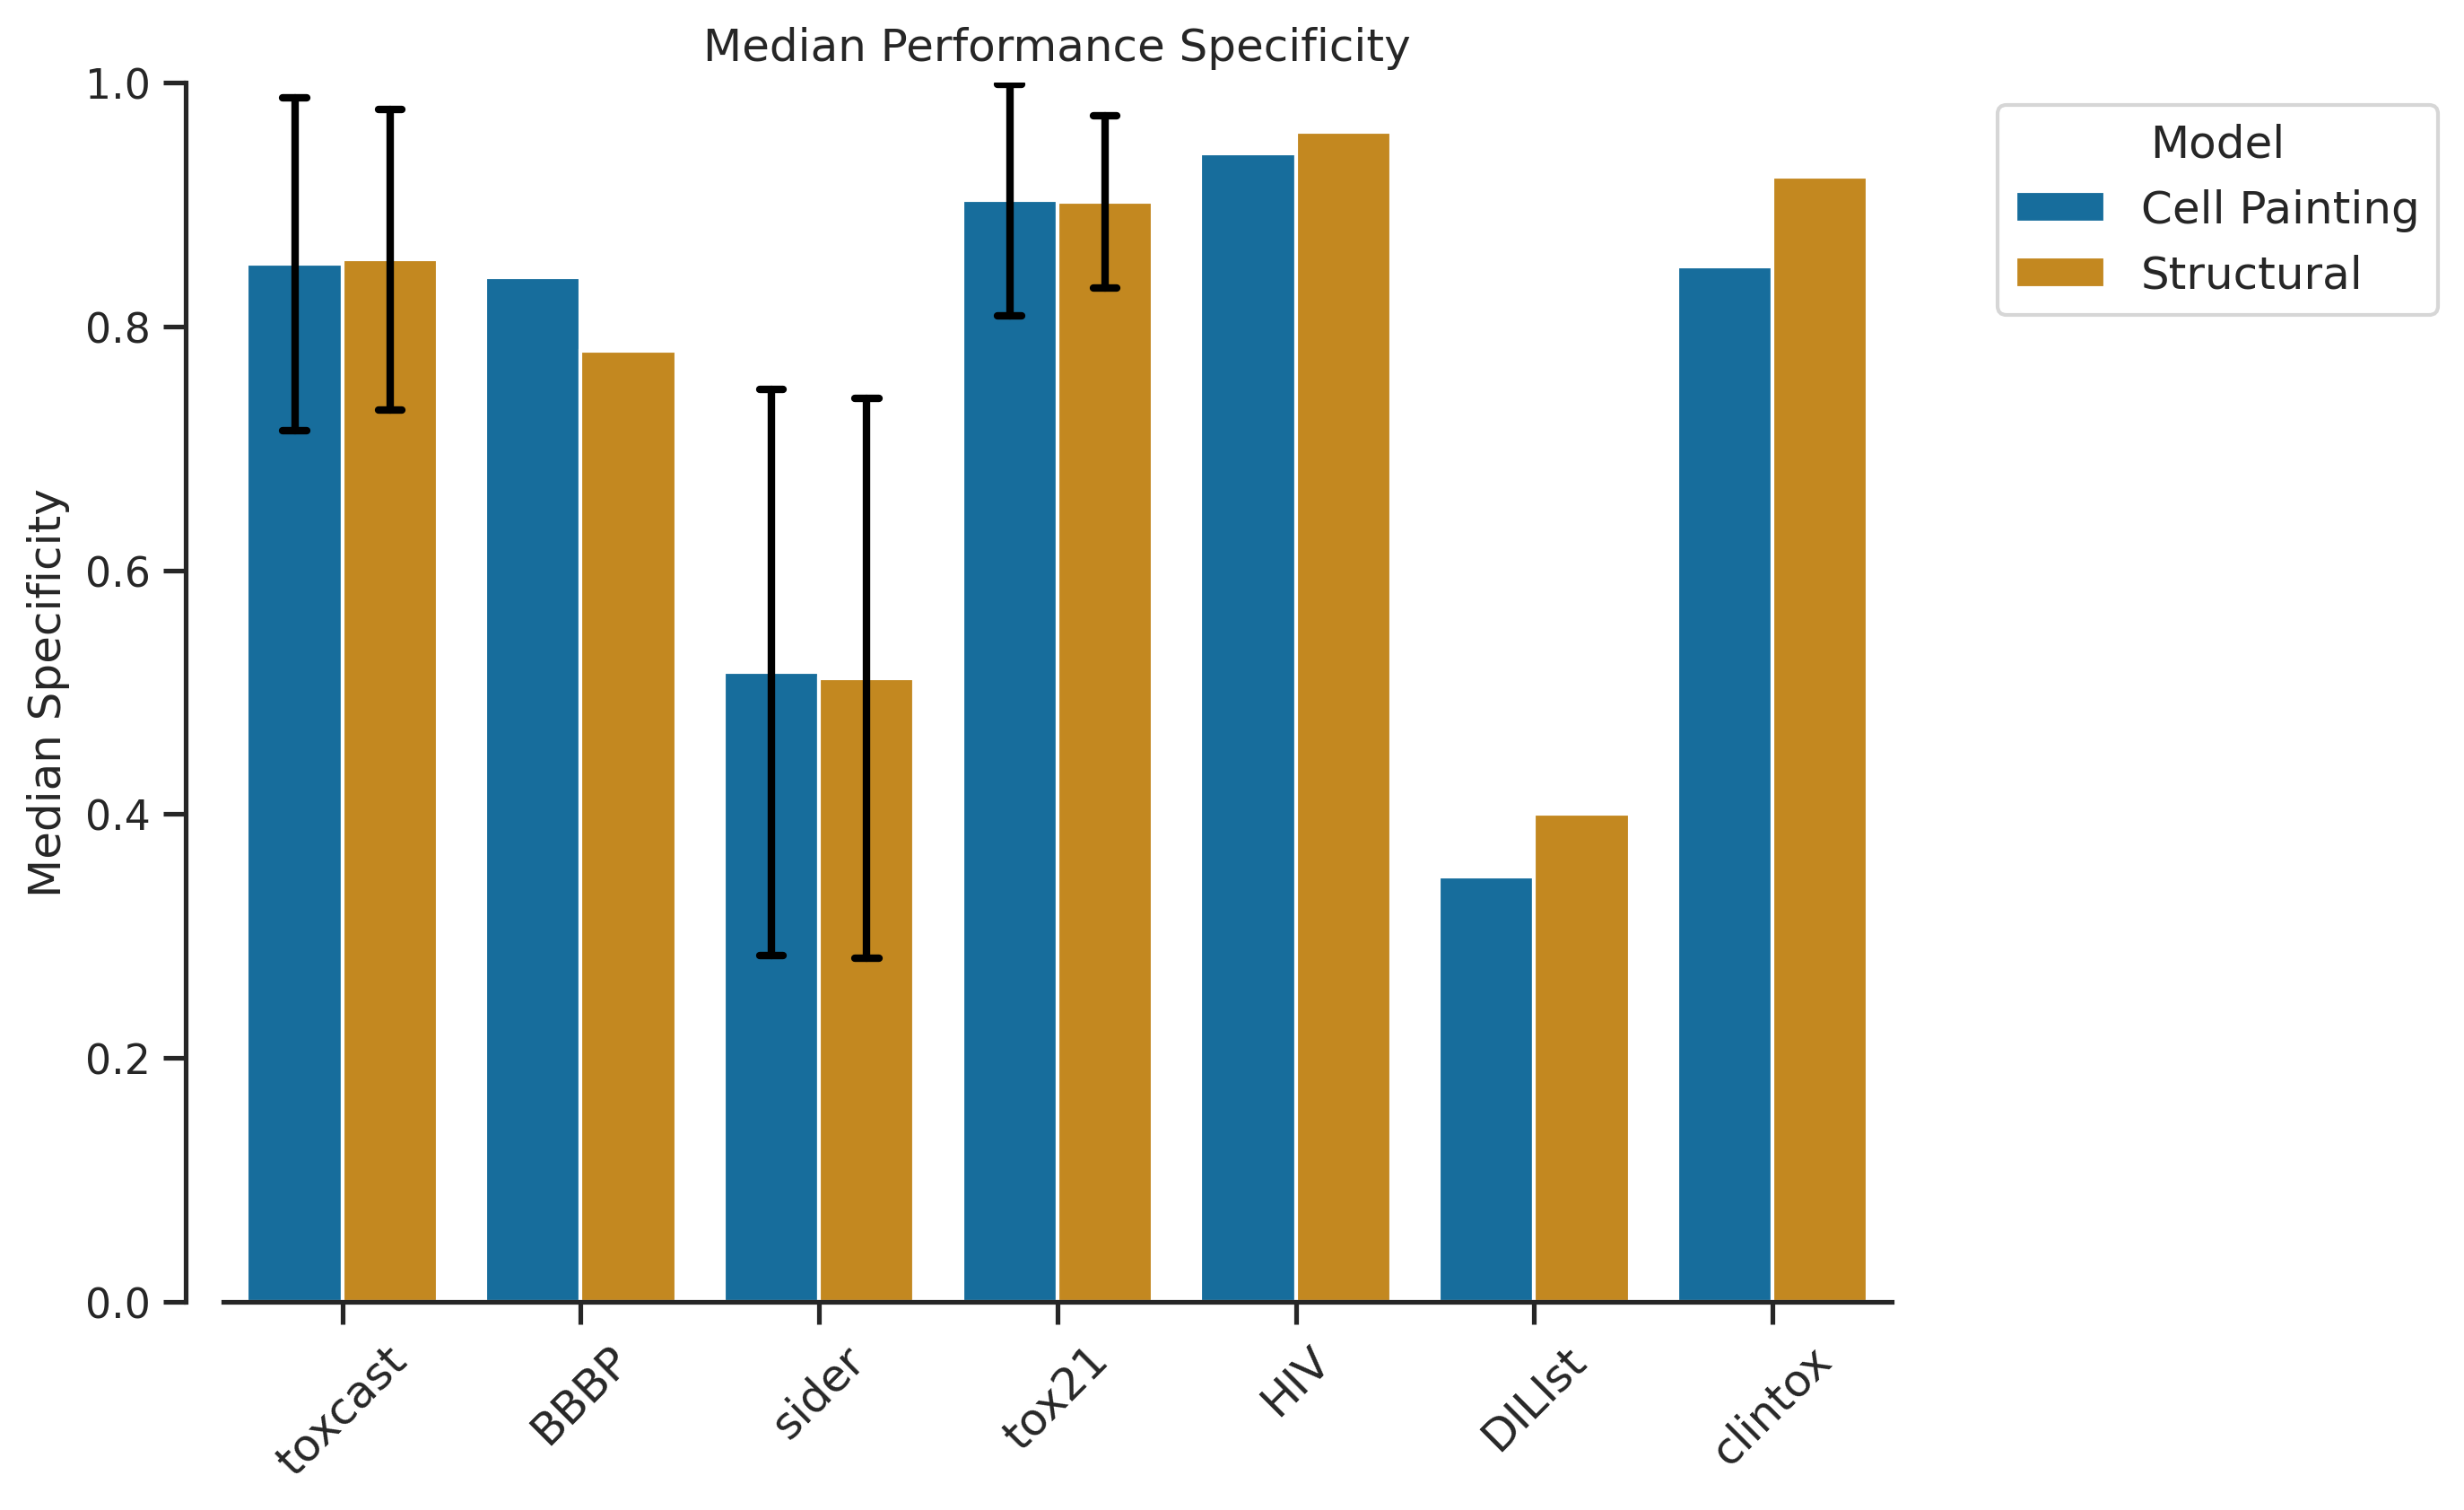

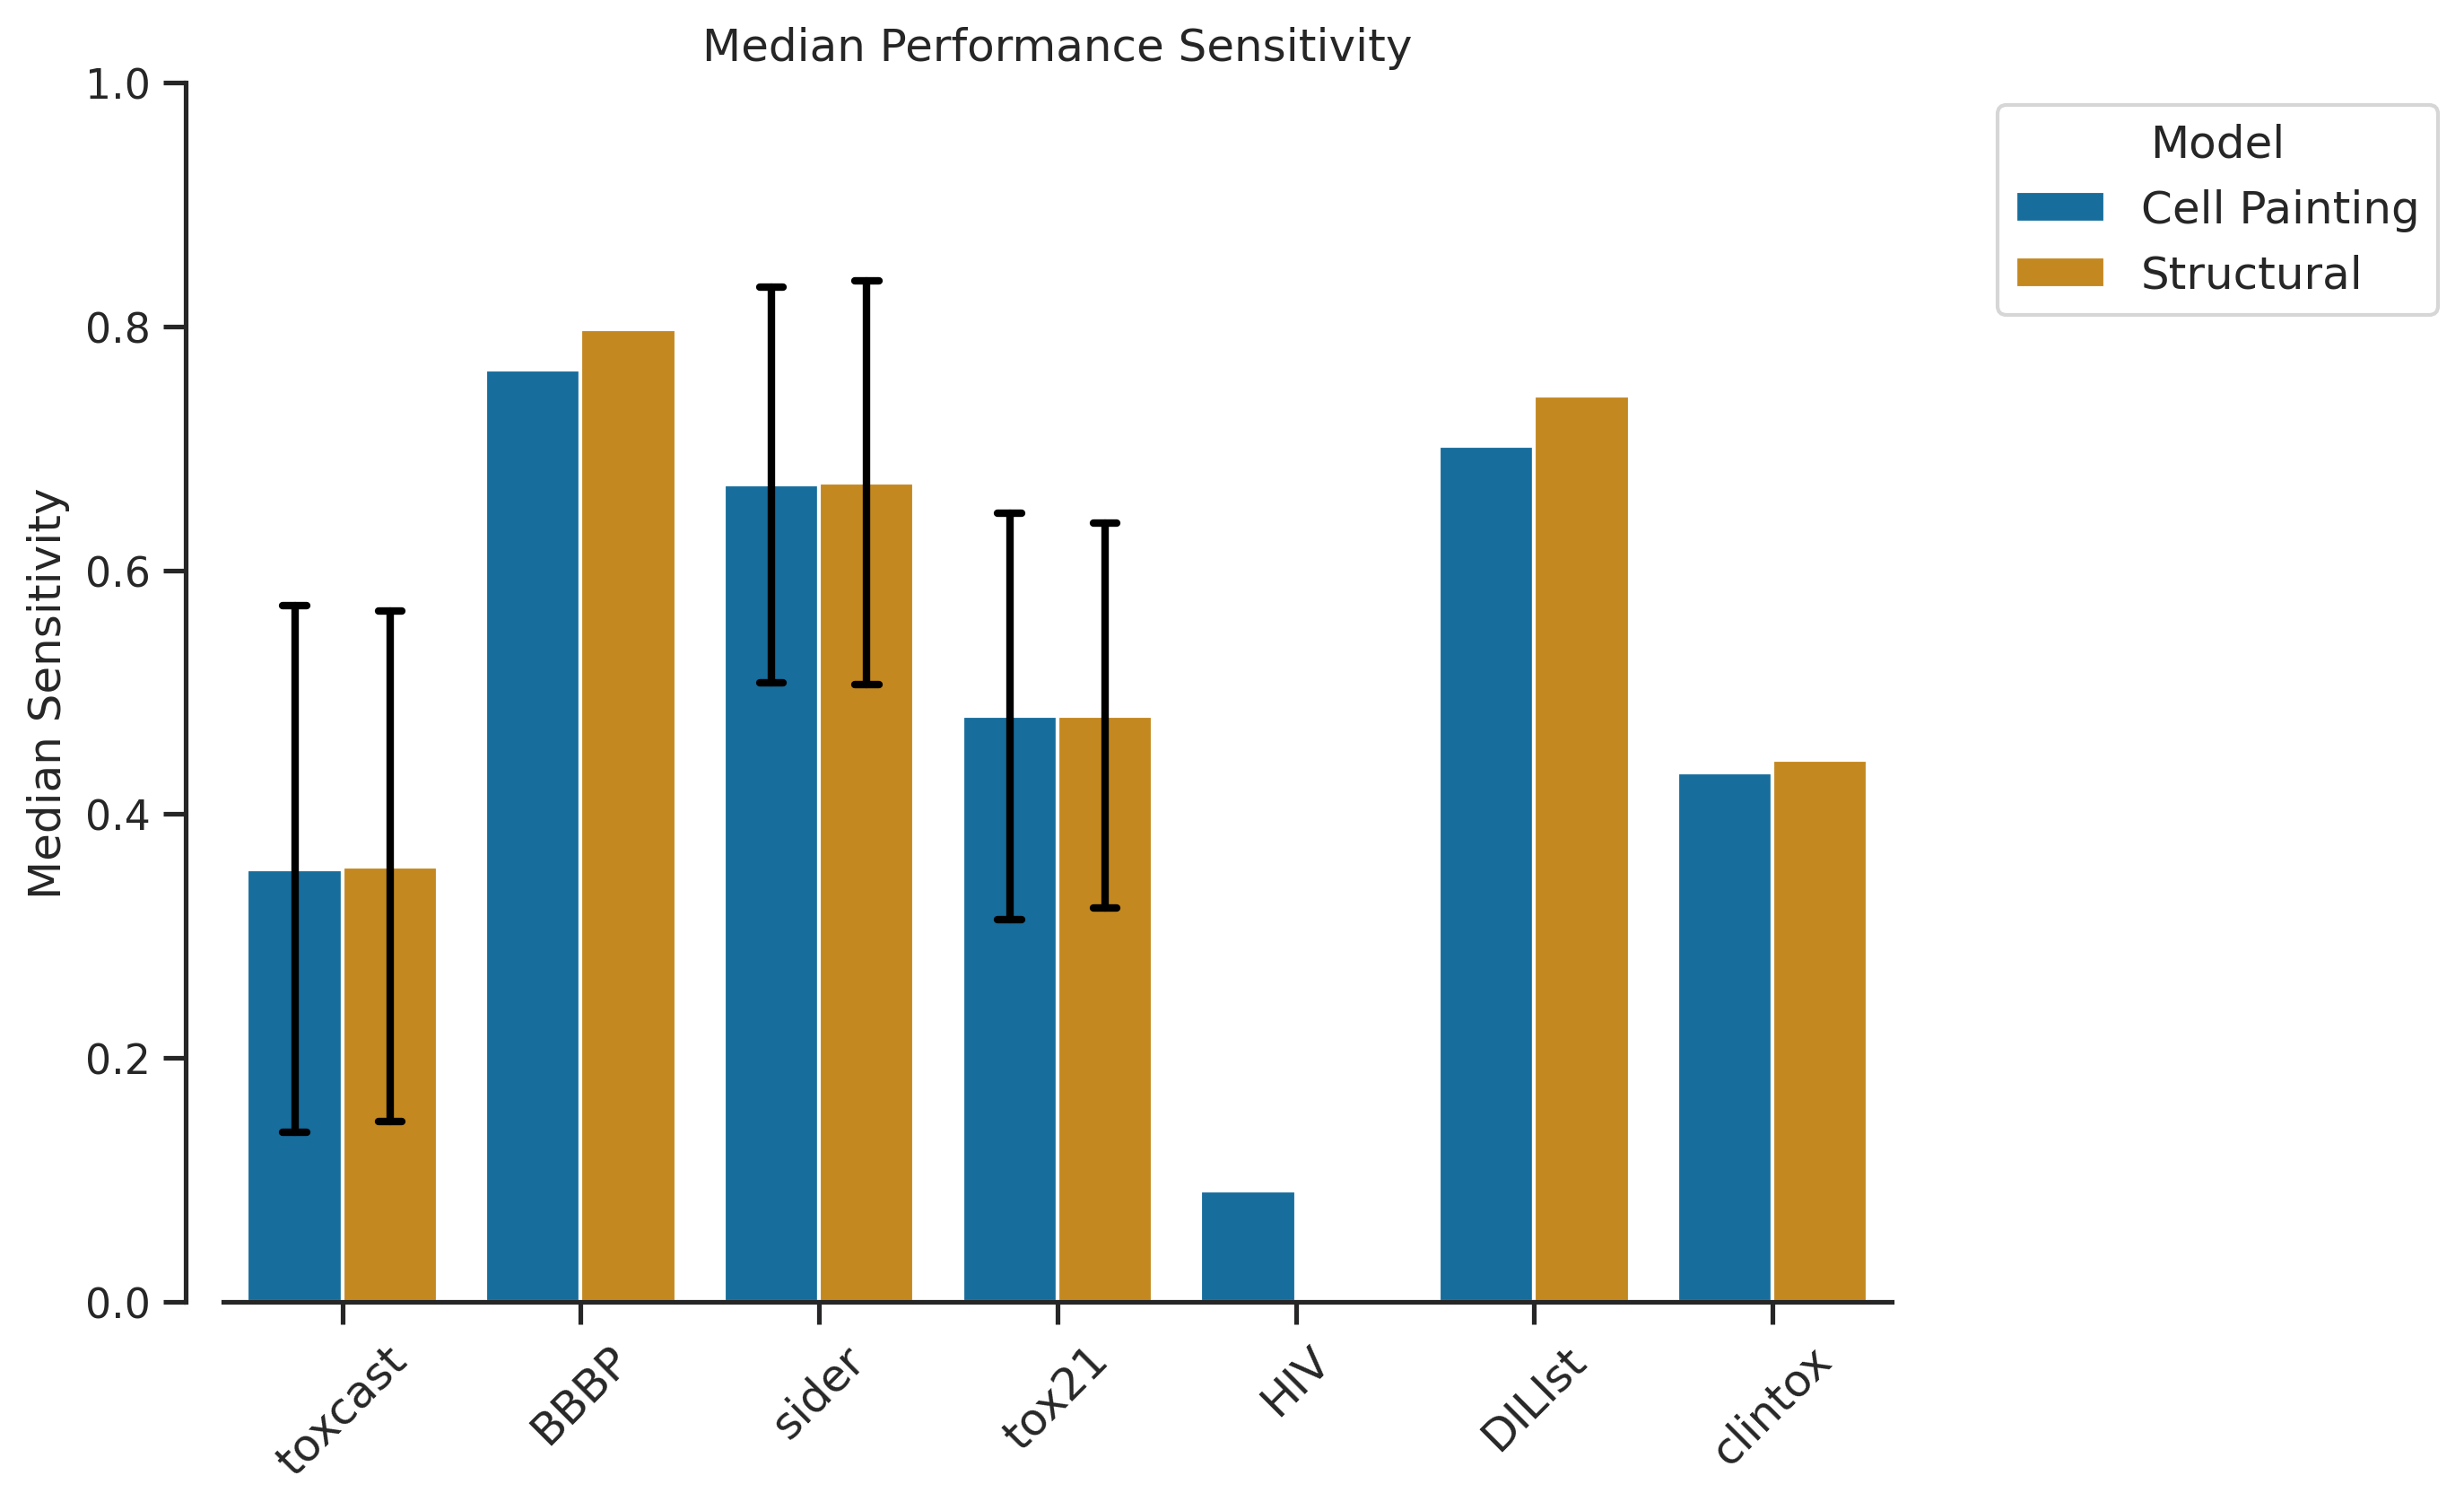

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the list of metrics to plot
metrics_to_plot = ['BA', 'AUC', 'MCC', 'AUCPR', 'Specificity', 'Sensitivity']

# Exclude the "PK_Lombardo" task
results_df = results_df[~results_df['Task'].isin(["PK_Lombardo"])]

# Set the width for grouped bars
width = 0.2

# Set a colorblind-friendly palette
colors = sns.color_palette("colorblind")

# Loop through each metric and create a grouped bar plot
for metric in metrics_to_plot:
    
    # Create a figure and axis using Seaborn
    plt.figure(figsize=(8, 6), dpi=300) 
    sns.set(style="white")  # Set the style

    metric_data = results_df[[f'img_Held_out_{metric}', 
                                      f'str_Held_out_{metric}', 'Task']]
    
    metric_data.columns = ["Cell Painting", "Structural", "Task"]

    # Melt the DataFrame to use 'hue' for differentiation
    melted_data = metric_data.reset_index().melt(id_vars='Task', 
                                            value_vars=["Cell Painting", "Structural"], 
                                            var_name='Metric', 
                                            value_name='Median Metric')
    # Create the grouped bar plot
    ax = sns.barplot(data=melted_data, x='Task', y='Median Metric', 
                hue='Metric', ci="sd", palette=colors, errcolor='black', 
                     errwidth=2, capsize=0.1) 
    

    # Set labels and title
    ax.set_ylabel(f'Median {metric}', fontsize=12)
    ax.set_title(f'Median Performance {metric}', fontsize=12)
    
    # Set x-axis ticks and labels with rotation, increased fontsize
    x_ticks = range(len(melted_data['Task'].unique()))
    x_labels = melted_data['Task'].unique()
    ax.set_xticklabels(x_labels, rotation=45, fontsize=12)  # Adjust rotation angle and fontsize

    # Add legend outside the box, on the upper right
    ax.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

    # Remove box line, set y-axis on the left, and add a line on the x-axis
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_position(('outward', 10))
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    # Ensure the bars sit on the x-axis
    ax.set_ylim(top=1.0)
    
    # Remove x-axis label
    ax.set_xlabel('')

    # Show the plot
    plt.savefig(f'{metric}_barplot_comparison.png', bbox_inches='tight')
    plt.show()

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

sider_Cell Painting v.s. sider_Structural: t-test paired samples with Bonferroni correction, P_val=3.794e-02 stat=2.686e+00
toxcast_Cell Painting v.s. toxcast_Structural: t-test paired samples with Bonferroni correction, P_val=5.599e-01 stat=-1.323e+00
tox21_Cell Painting v.s. tox21_Structural: t-test paired samples with Bonferroni correction, P_val=1.000e+00 stat=2.601e-01


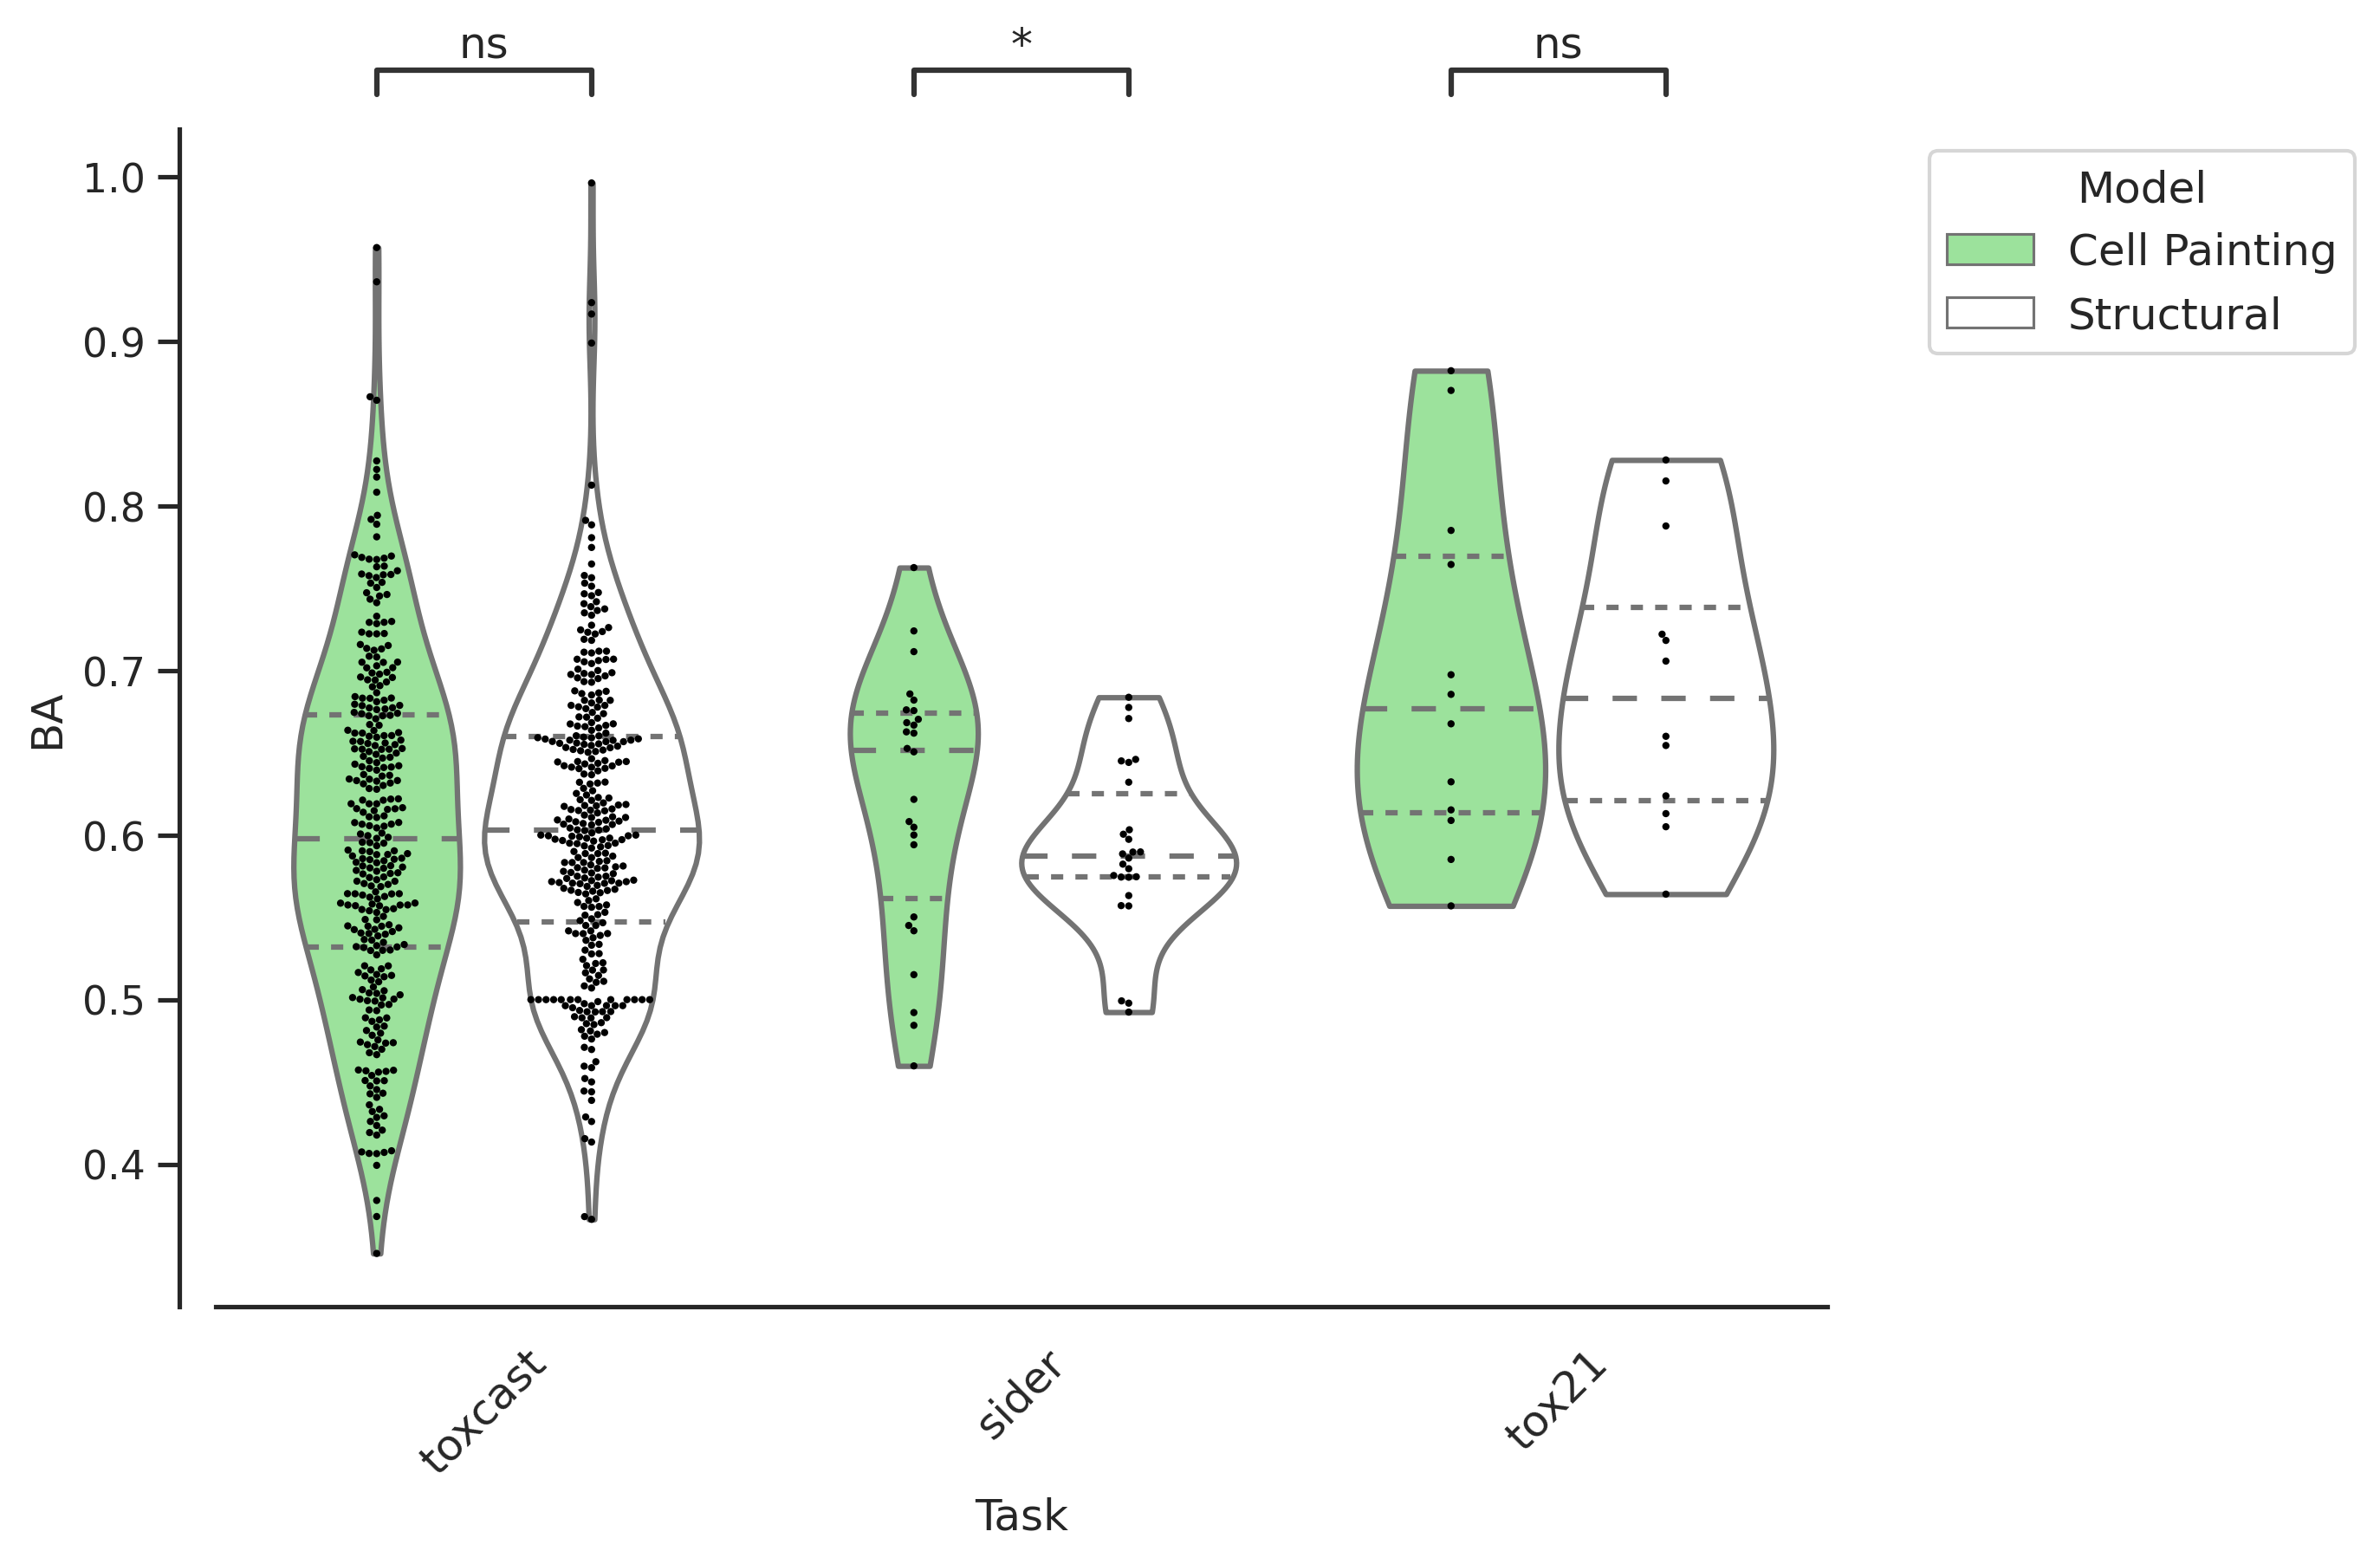

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

sider_Cell Painting v.s. sider_Structural: t-test paired samples with Bonferroni correction, P_val=1.000e+00 stat=2.044e-01
toxcast_Cell Painting v.s. toxcast_Structural: t-test paired samples with Bonferroni correction, P_val=1.000e+00 stat=-8.751e-01
tox21_Cell Painting v.s. tox21_Structural: t-test paired samples with Bonferroni correction, P_val=1.000e+00 stat=-9.492e-01


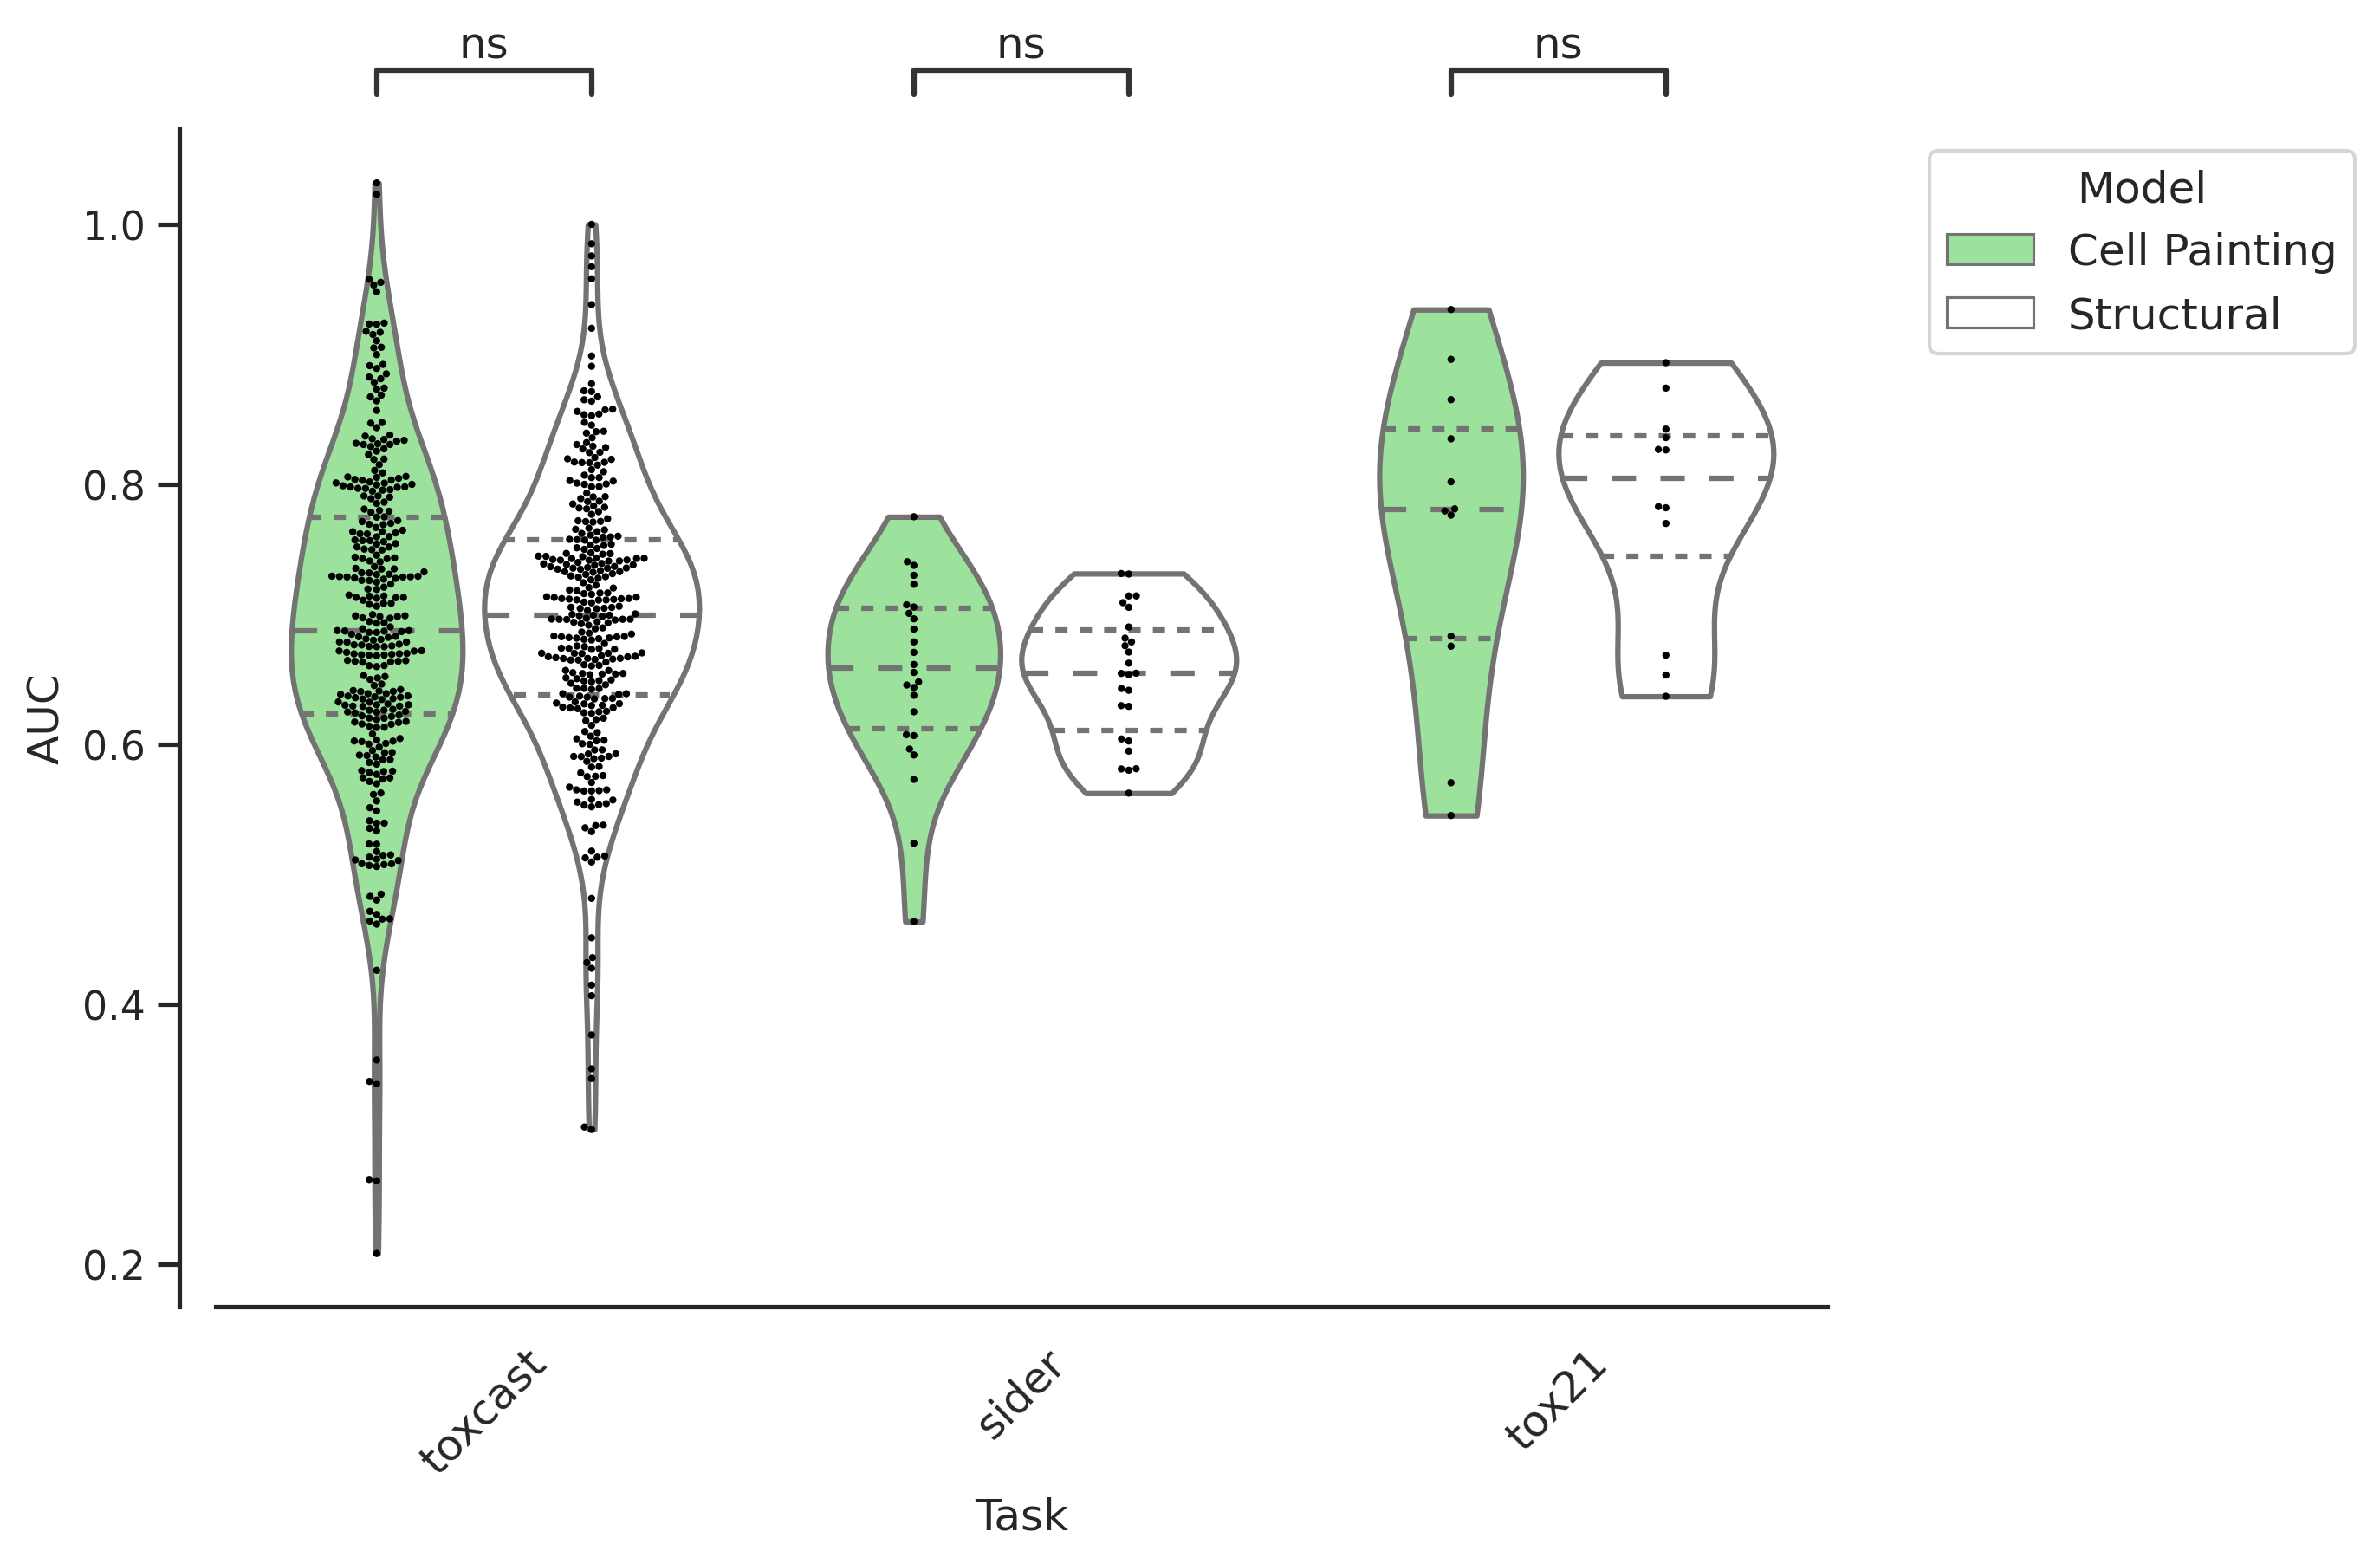

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

sider_Cell Painting v.s. sider_Structural: t-test paired samples with Bonferroni correction, P_val=1.000e+00 stat=-5.884e-03
toxcast_Cell Painting v.s. toxcast_Structural: t-test paired samples with Bonferroni correction, P_val=1.000e+00 stat=-6.792e-01
tox21_Cell Painting v.s. tox21_Structural: t-test paired samples with Bonferroni correction, P_val=1.000e+00 stat=-1.088e-01


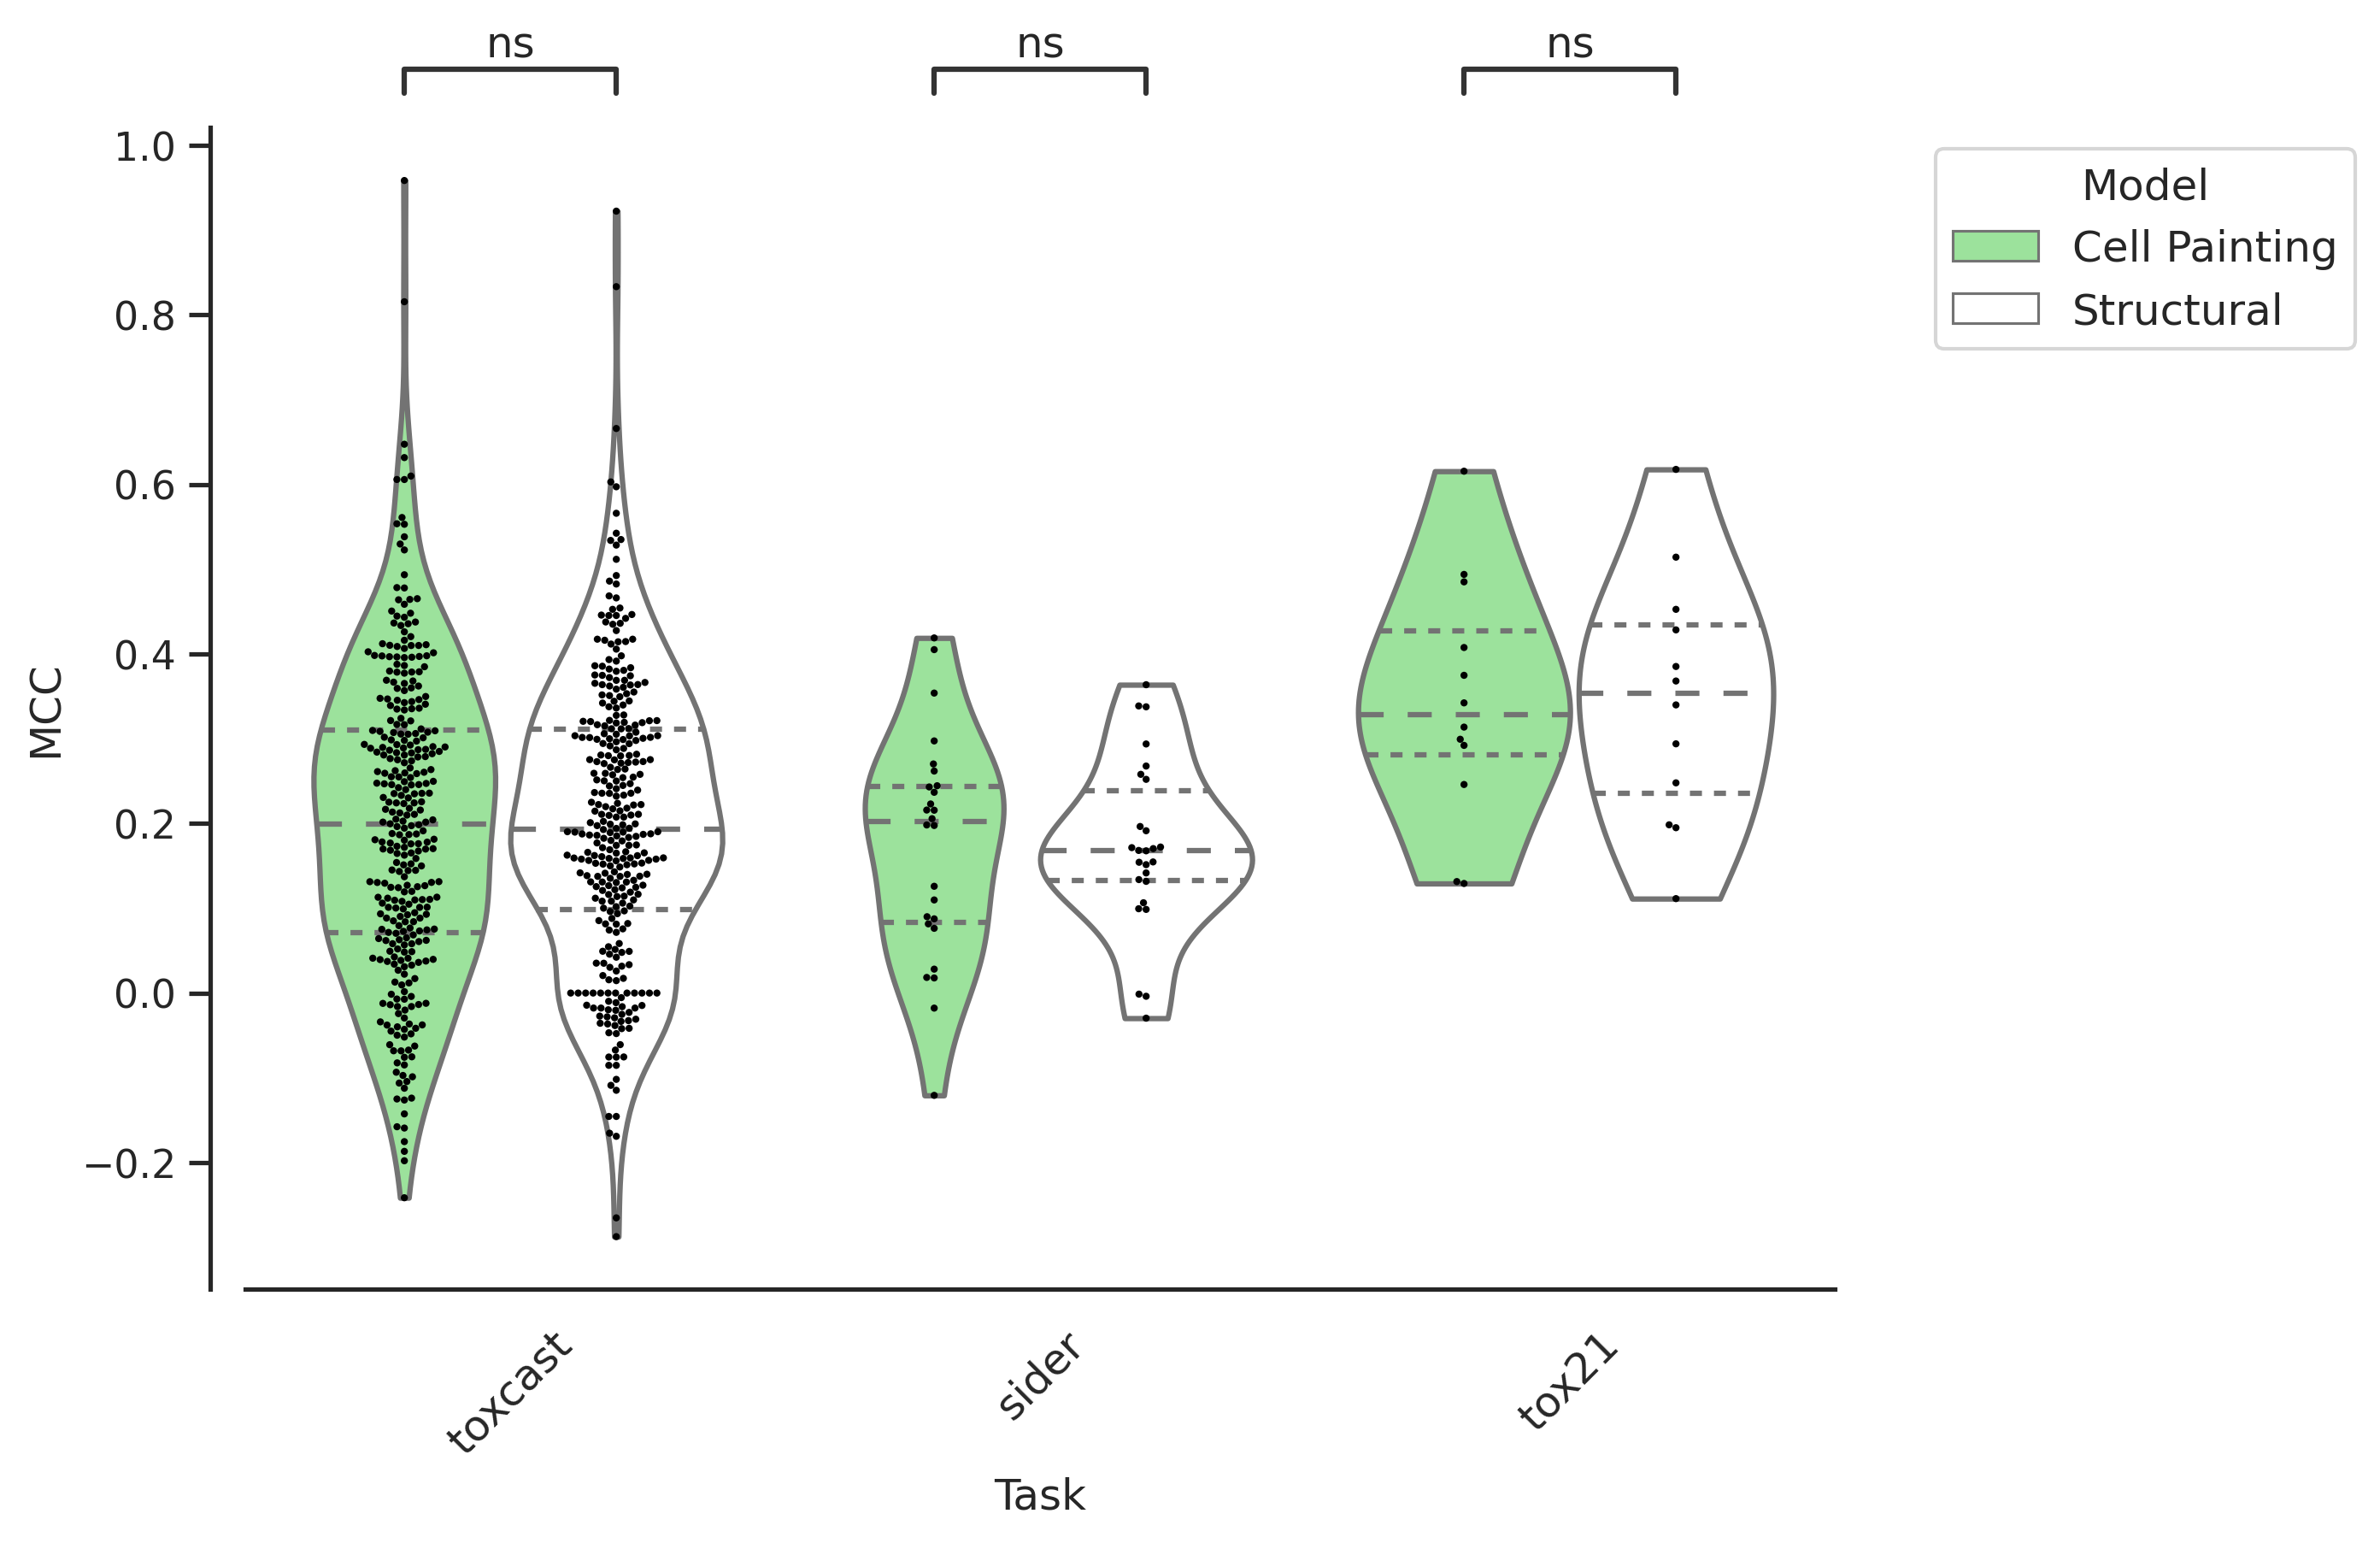

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

sider_Cell Painting v.s. sider_Structural: t-test paired samples with Bonferroni correction, P_val=6.394e-01 stat=-1.278e+00
toxcast_Cell Painting v.s. toxcast_Structural: t-test paired samples with Bonferroni correction, P_val=9.623e-02 stat=-2.153e+00
tox21_Cell Painting v.s. tox21_Structural: t-test paired samples with Bonferroni correction, P_val=1.000e+00 stat=4.769e-02


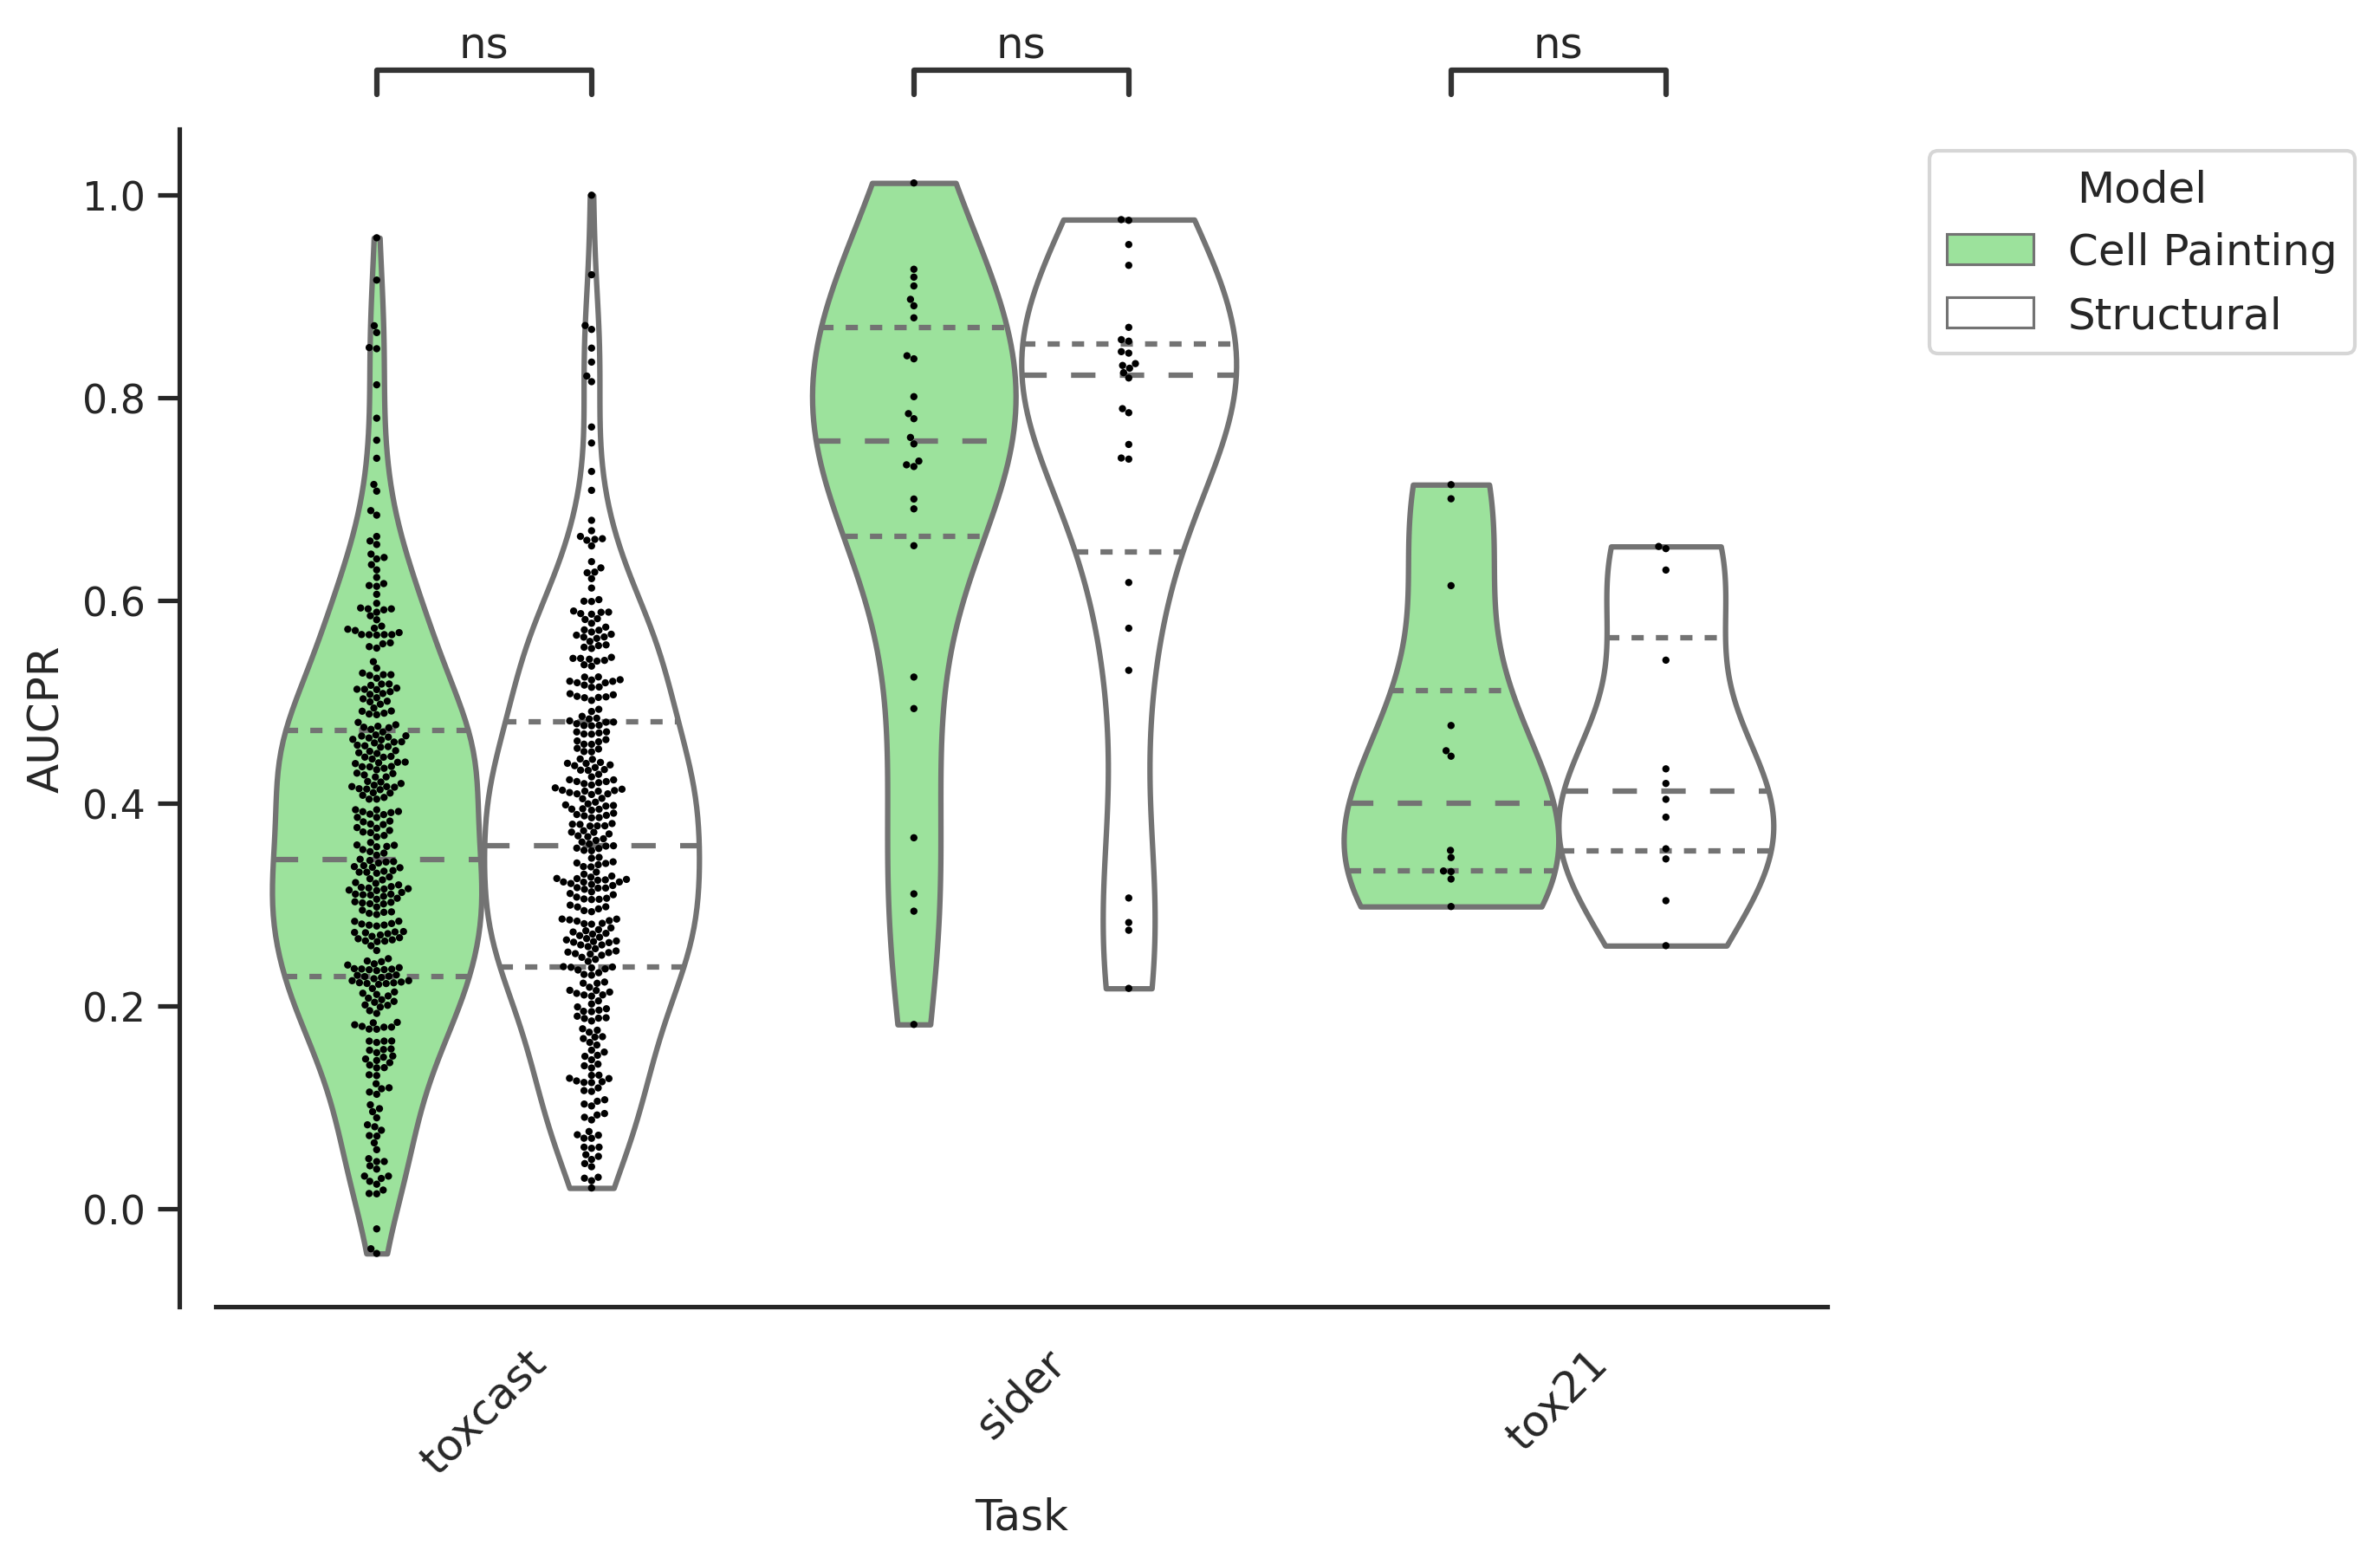

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

sider_Cell Painting v.s. sider_Structural: t-test paired samples with Bonferroni correction, P_val=1.000e+00 stat=3.621e-01
toxcast_Cell Painting v.s. toxcast_Structural: t-test paired samples with Bonferroni correction, P_val=6.705e-01 stat=-1.220e+00
tox21_Cell Painting v.s. tox21_Structural: t-test paired samples with Bonferroni correction, P_val=1.000e+00 stat=6.990e-02


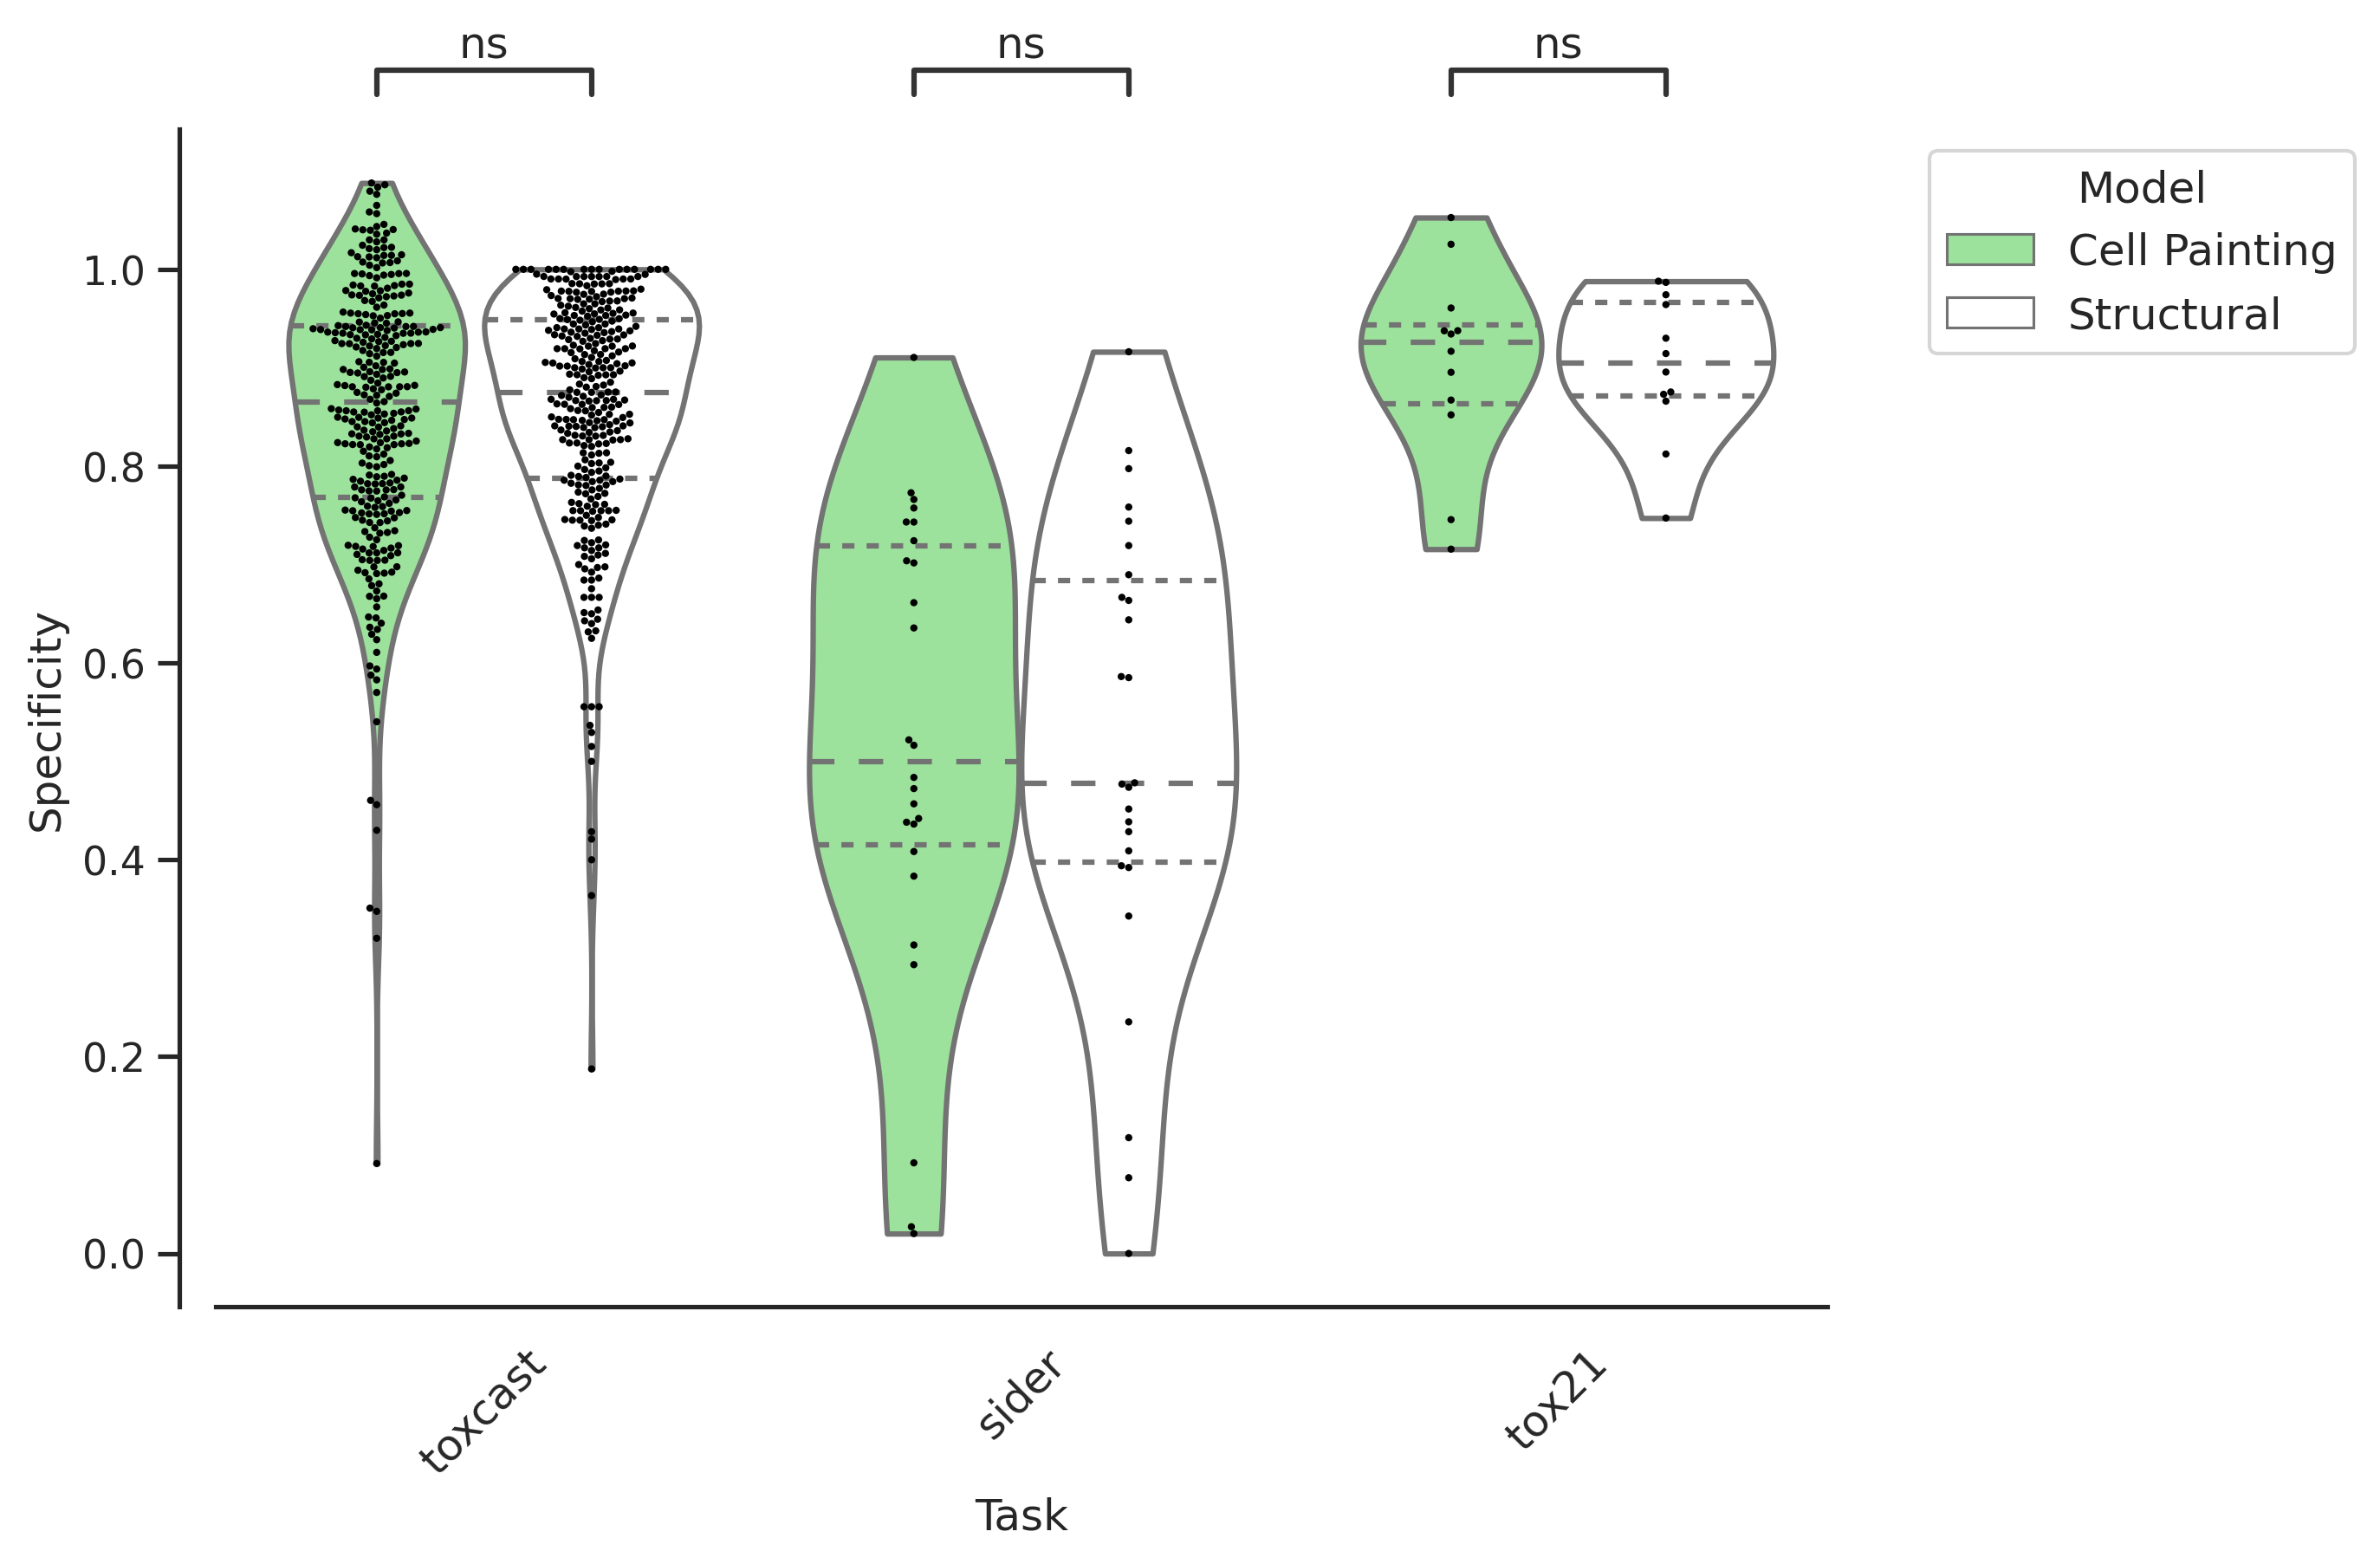

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

sider_Cell Painting v.s. sider_Structural: t-test paired samples with Bonferroni correction, P_val=1.000e+00 stat=-1.704e-01
toxcast_Cell Painting v.s. toxcast_Structural: t-test paired samples with Bonferroni correction, P_val=1.000e+00 stat=-7.648e-01
tox21_Cell Painting v.s. tox21_Structural: t-test paired samples with Bonferroni correction, P_val=1.000e+00 stat=-6.834e-02


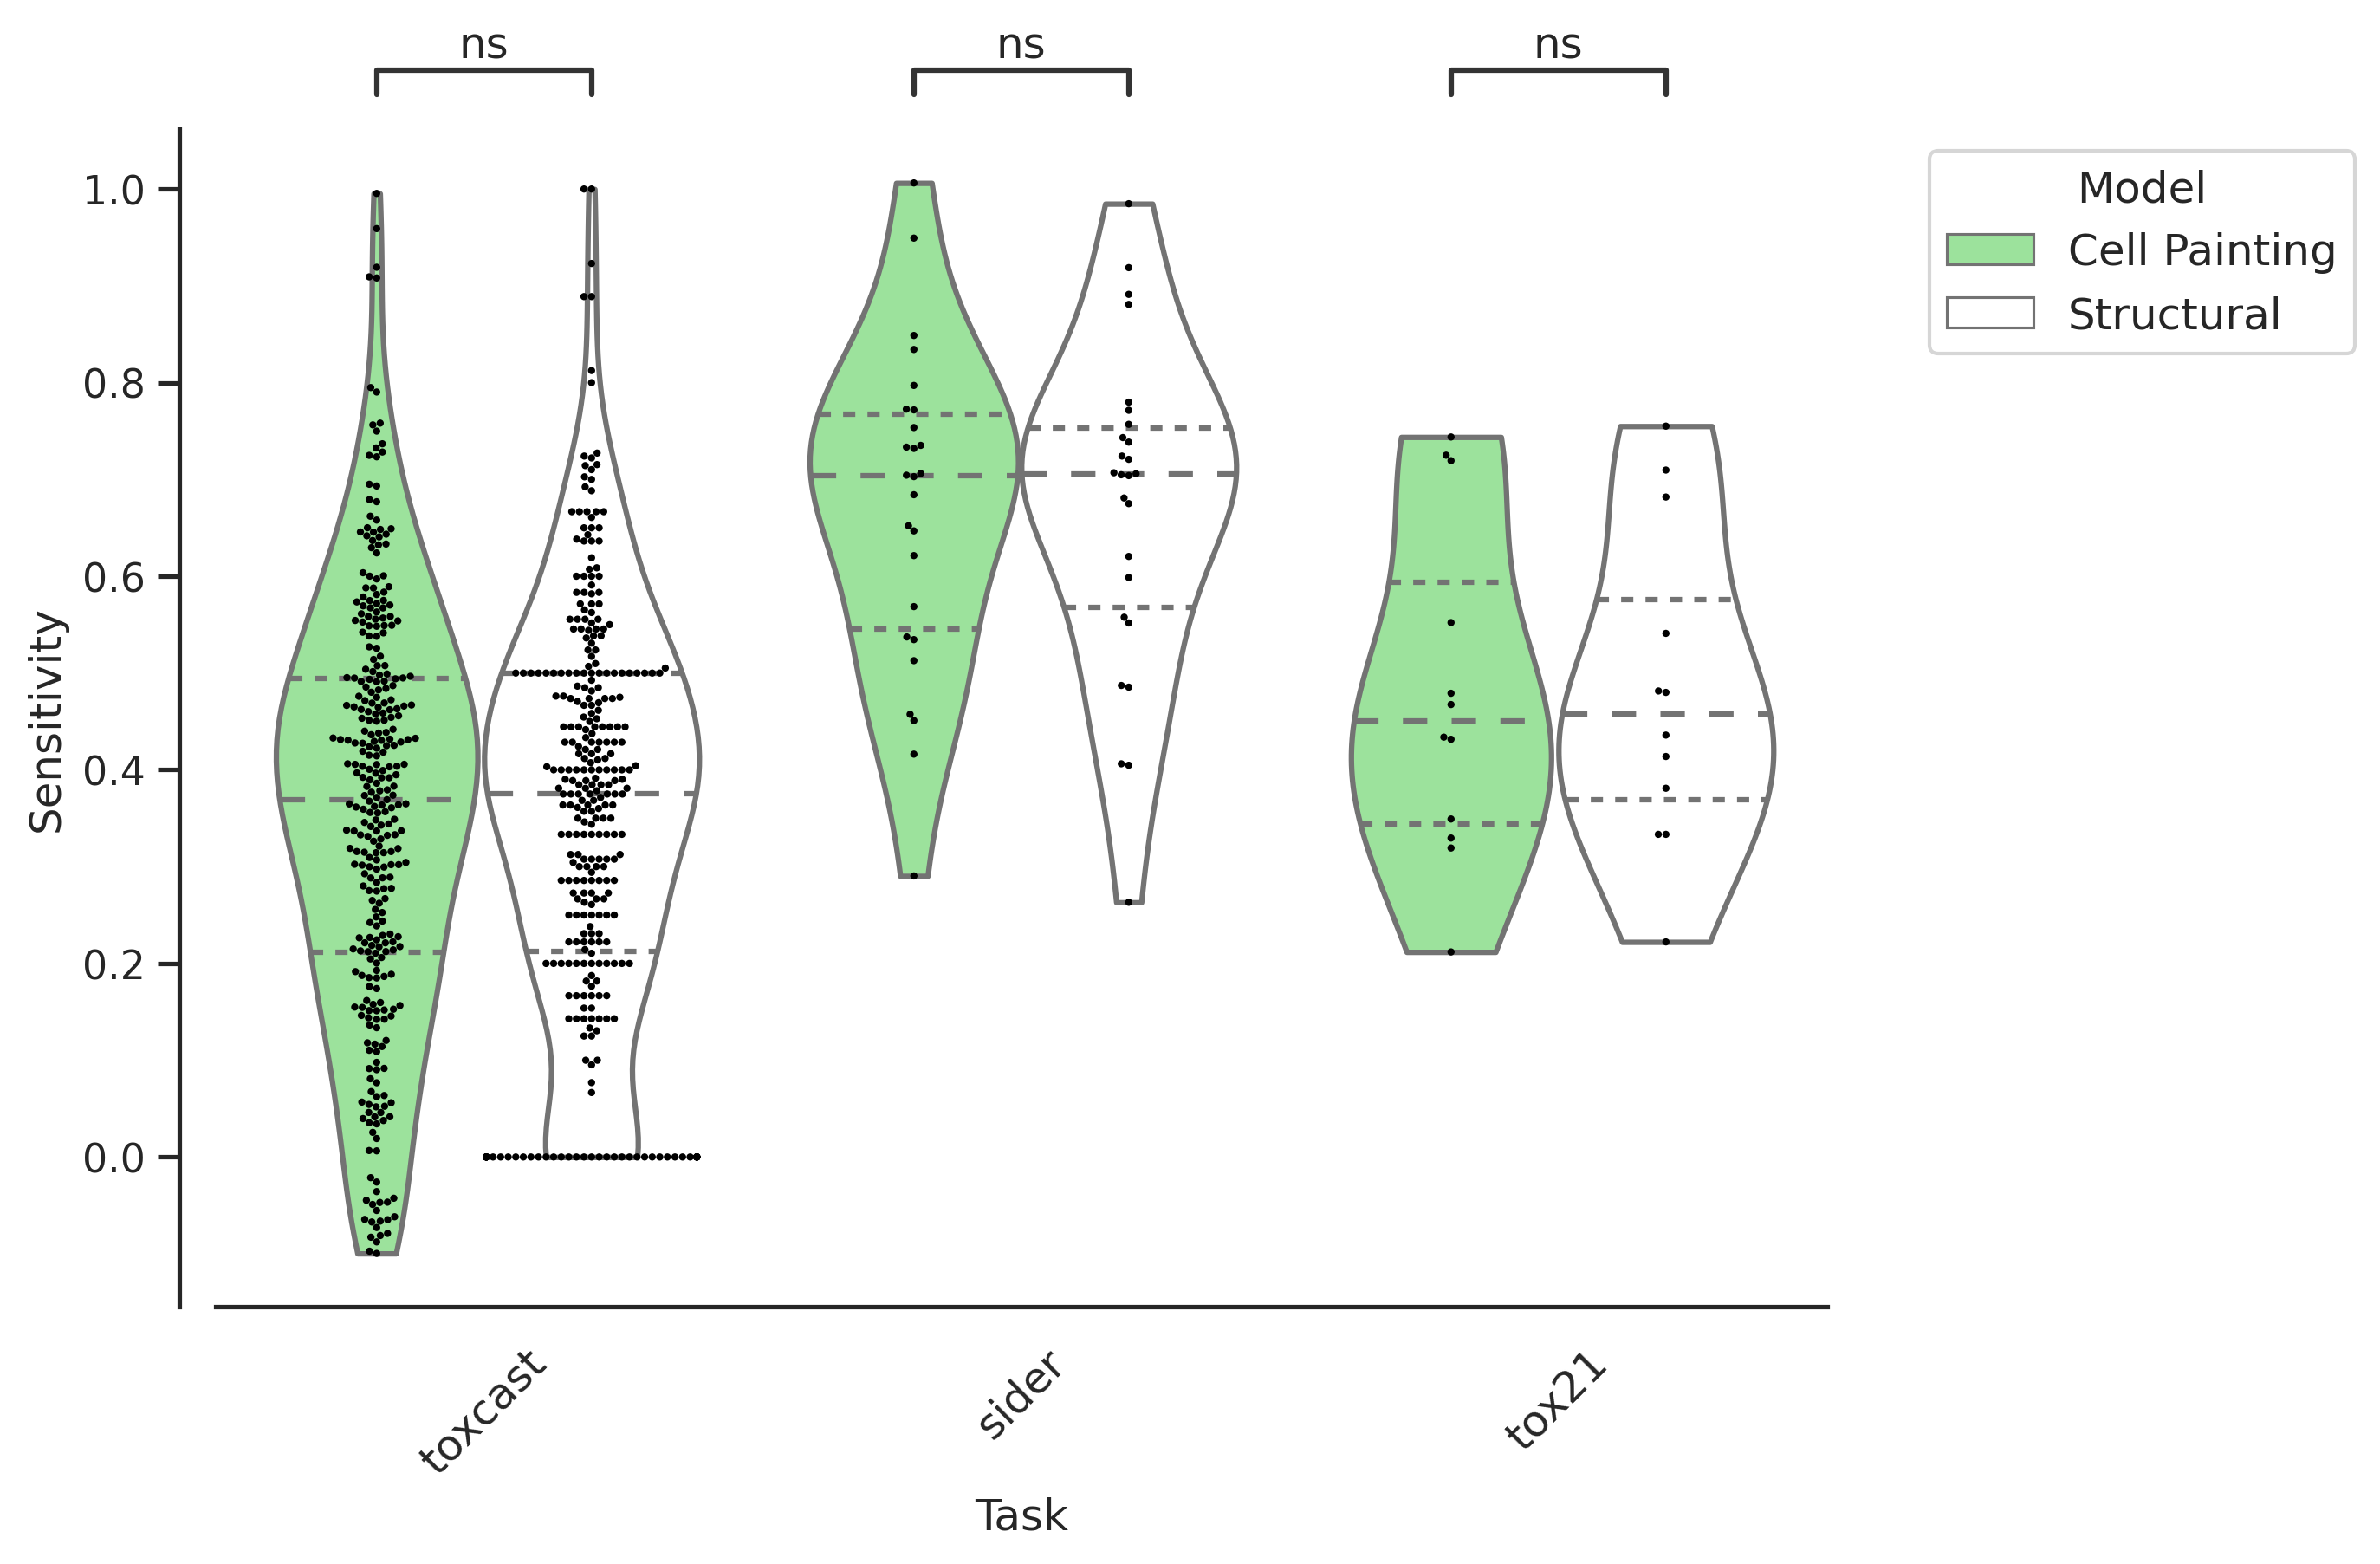

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the list of metrics to plot
metrics_to_plot = ['BA', 'AUC', 'MCC', 'AUCPR', 'Specificity', 'Sensitivity']

# Filter the DataFrame to include only 'sider', 'toxcast', and 'tox21' tasks
tasks_to_plot = ['sider', 'toxcast', 'tox21']
results_df_violin = results_df[results_df['Task'].isin(tasks_to_plot)]

# Set a colorblind-friendly palette
colors = sns.color_palette("colorblind")

# Loop through each metric and create a violin plot for each
for metric in metrics_to_plot:
    
    # Create a figure and axis using Seaborn
    plt.figure(figsize=(8, 6), dpi=300) 
    sns.set(style="white")  # Set the style

    metric_data = results_df_violin[[f'img_Held_out_{metric}', 
                              f'str_Held_out_{metric}', 'Task']]
    
    metric_data.columns = ["Cell Painting", "Structural", "Task"]

    # Melt the DataFrame to use 'hue' for differentiation
    melted_data = metric_data.melt(id_vars='Task', 
                                   value_vars=["Cell Painting", "Structural"], 
                                   var_name='Metric', 
                                   value_name='Metric Value')
    
    # Create the violin plot
    ax = sns.violinplot(data=melted_data, x='Task', y='Metric Value', hue='Metric',
                        palette=["lightgreen", "white"], inner="quart", cut=0, alpha=0.7)  # Adjust alpha

    # Overlay the swarm plot on top of the violin plot without a legend
    sns.swarmplot(data=melted_data, x='Task', y='Metric Value', hue='Metric',
                  palette=["black", "black"], dodge=True, size=2)  # Remove legend

    # Set labels and title
    ax.set_ylabel(f'{metric}', fontsize=12)
    #ax.set_title(f'{metric} Distribution for Tasks', fontsize=12)

    # Set x-axis ticks and labels with rotation, increased fontsize
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12)

    # Add statistical annotations for the comparison within each task
    add_stat_annotation(ax, data=melted_data, x='Task', y='Metric Value', hue='Metric',
                        box_pairs=[(("toxcast", "Cell Painting"), ("toxcast", "Structural")),
                                   (("sider", "Cell Painting"), ("sider", "Structural")),
                                   (("tox21", "Cell Painting"), ("tox21", "Structural"))], 
                        test='t-test_paired', text_format='star', loc='outside')

    # Create a custom legend for the violin plot
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[:2], labels[:2], title='Model', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

    # Remove box line, set y-axis on the left
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_position(('outward', 10))
    ax.yaxis.set_ticks_position('left')

    # Show the plot
    plt.savefig(f'{metric}_violinswarm_comparison.png', bbox_inches='tight')
    plt.show()


In [ ]:
#Code Snippets for more plots